In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from numpy import mean, std
from math import sqrt
    

In [21]:
df = pd.read_csv(r"E:\ny_housing_project\NY-House-Dataset-Cleaned.csv")
df.shape

(4543, 14)

In [22]:
df.head()
df['BATH'] = df['BATH'].astype(str).str.replace(',', '.')
df['BATH'] = df['BATH'].astype(float).astype(int)


In [23]:
df_luxury = df[df['LUXURY']]
df_normal = df[~df['LUXURY']]

# Exploratory Data Analysis (EDA)
## 1.1. Ph√¢n t√≠ch ƒê·ªãnh t√≠nh & ƒê·ªãnh l∆∞·ª£ng C∆° b·∫£n


In [24]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu:", df_normal.shape)
print("\nTh√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:")
print(df_normal.info())
print("\nTh·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë:")
display(df_normal.describe())

df_normal.sort_values(by='PRICE_PER_SQFT',ascending=True)

K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (3726, 14)

Th√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
Index: 3726 entries, 0 to 4528
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BROKERTITLE        3726 non-null   object 
 1   PRICE              3726 non-null   int64  
 2   BEDS               3726 non-null   int64  
 3   BATH               3726 non-null   int64  
 4   PROPERTYSQFT       3726 non-null   float64
 5   FORMATTED_ADDRESS  3726 non-null   object 
 6   LATITUDE           3726 non-null   float64
 7   LONGITUDE          3726 non-null   float64
 8   STATUS             3726 non-null   object 
 9   PROPERTY_TYPE      3726 non-null   object 
 10  ZIP                3726 non-null   int64  
 11  BOROUGH            3726 non-null   object 
 12  PRICE_PER_SQFT     3726 non-null   float64
 13  LUXURY             3726 non-null   bool   
dtypes: bool(1), float64(4), int64(4), objec

PRICE     BEDS     BATH  PROPERTYSQFT  LATITUDE  LONGITUDE  \
count     3,726.00 3,726.00 3,726.00      3,726.00  3,726.00   3,726.00   
mean    780,770.00     3.02     1.97      1,761.14     40.71     -73.93   
std     447,470.05     1.95     1.14        811.65      0.09       0.11   
min      49,500.00     1.00     1.00        230.00     40.50     -74.25   
25%     425,000.00     2.00     1.00      1,066.00     40.63     -73.98   
50%     699,000.00     3.00     2.00      2,041.00     40.72     -73.93   
75%     999,999.00     4.00     2.00      2,184.21     40.77     -73.86   
max   1,999,999.00    19.00    10.00      7,854.00     40.91     -73.70   

            ZIP  PRICE_PER_SQFT  
count  3,726.00        3,726.00  
mean  10,830.63          496.93  
std      550.83          305.89  
min   10,001.00           45.33  
25%   10,306.00          298.34  
50%   11,207.00          430.57  
75%   11,357.00          624.17  
max   11,697.00        2,976.19

BROKERTITLE    PRICE  BEDS  BATH  PROPERTYSQFT  \
42          5 boro corp    99000     1     1      2,184.21   
65      keller williams   109000     1     1      2,184.21   
1764           nobroker   115000     3     1      2,184.21   
2686  meyers enterprise   119000     3     2      2,184.21   
1939   la rosa new york   119000     3     1      2,184.21   
...                 ...      ...   ...   ...           ...   
744             compass  1995000     1     2        910.00   
2006           corcoran  1200000     3     1        500.00   
420            corcoran  1995000     1     1        826.00   
598            corcoran  1850000     1     1        703.00   
1927            serhant   875000     3     1        294.00   

                                      FORMATTED_ADDRESS  LATITUDE  LONGITUDE  \
42         1368 E 92nd St #300, Brooklyn, NY 11236, USA     40.64     -73.90   
65           335 E 209th St Apt 4, Bronx, NY 10467, USA     40.88     -73.87   
1764         87-15 165th St #6c, Jamaica, NY 11432, USA     40.71     -73.80   
2686           3652 De Reimer Ave, Bronx, NY 10466, USA     40.88     -73.84   
1939        86-16 60th Ave #1c, Elmhurst, NY 11373, USA     40.73     -73.87   
...                                                 ...       ...        ...   
744           29 W 85th St # 1, New York, NY 10024, USA     40.79     -73.97   
2006         299 W 12th St #3b, New York, NY 10014, USA     40.74     -74.01   
420   Devonshire House, 28 E 10th St #1k, New York, ...     40.73     -73.99   
598             25 5th Ave #5g, New York, NY 10003, USA     40.73     -74.00   
1927          11 E 68th St #7j, New York, NY 10065, USA     40.77     -73.97   

       STATUS PROPERTY_TYPE    ZIP    BOROUGH  PRICE_PER_SQFT  LUXURY  
42    unknown         condo  11236   Brooklyn           45.33   False  
65    unknown         co op  10467      Bronx           49.90   False  
1764  unknown         co op  11432     Queens           52.65   False  
2686  unknown          land  10466  Manhattan           54.48   False  
1939  pending         other  11373     Queens           54.48   False  
...       ...           ...    ...        ...             ...     ...  
744   unknown         condo  10024  Manhattan        2,192.31   False  
2006  unknown         condo  10014  Manhattan        2,400.00   False  
420   unknown         condo  10003  Manhattan        2,415.25   False  
598   unknown         condo  10003  Manhattan        2,631.58   False  
1927  unknown         condo  10065  Manhattan        2,976.19   False  

[3726 rows x 14 columns]

Ph√¢n b·ªï gi√° l·ªách ph·∫£i m·∫°nh, ch·ªß y·∫øu t·∫≠p trung ·ªü ph√¢n kh√∫c 400k‚Äì1M USD.

Manhattan n·ªïi b·∫≠t v·ªõi gi√°/sqft cao nh·∫•t (~1.000 USD/sqft), trong khi Bronx/Queens c√≥ nhi·ªÅu cƒÉn h·ªô gi√° r·∫ª.

Outlier t·ªìn t·∫°i ·ªü s·ªë ph√≤ng ng·ªß (19), di·ªán t√≠ch (2.184 sqft l·∫∑p l·∫°i nhi·ªÅu l·∫ßn, nghi ng·ªù d·ªØ li·ªáu nh·∫≠p).

Th·ªã tr∆∞·ªùng ƒëa d·∫°ng: t·ª´ cƒÉn h·ªô nh·ªè v√†i ch·ª•c ngh√¨n ƒë√¥ ƒë·∫øn b·∫•t ƒë·ªông s·∫£n g·∫ßn 2 tri·ªáu ƒë√¥, ph√π h·ª£p nhi·ªÅu ƒë·ªëi t∆∞·ª£ng ng∆∞·ªùi mua.

In [25]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu:", df_luxury.shape)

print("\nTh√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:")
print(df_luxury.info())
print("\nTh·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë:")
display(df_luxury.describe())


df_luxury.sort_values(by='PRICE_PER_SQFT',ascending=True)

K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (817, 14)

Th√¥ng tin c√°c c·ªôt v√† ki·ªÉu d·ªØ li·ªáu:
<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 22 to 4542
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BROKERTITLE        817 non-null    object 
 1   PRICE              817 non-null    int64  
 2   BEDS               817 non-null    int64  
 3   BATH               817 non-null    int64  
 4   PROPERTYSQFT       817 non-null    float64
 5   FORMATTED_ADDRESS  817 non-null    object 
 6   LATITUDE           817 non-null    float64
 7   LONGITUDE          817 non-null    float64
 8   STATUS             817 non-null    object 
 9   PROPERTY_TYPE      817 non-null    object 
 10  ZIP                817 non-null    int64  
 11  BOROUGH            817 non-null    object 
 12  PRICE_PER_SQFT     817 non-null    float64
 13  LUXURY             817 non-null    bool   
dtypes: bool(1), float64(4), int64(4), object

PRICE   BEDS   BATH  PROPERTYSQFT  LATITUDE  LONGITUDE  \
count         817.00 817.00 817.00        817.00    817.00     817.00   
mean    7,099,559.27   4.92   4.10      4,072.74     40.73     -73.97   
std    10,259,840.13   4.26   3.47      4,666.25      0.06       0.05   
min     2,000,000.00   1.00   1.00        750.00     40.52     -74.22   
25%     2,599,999.00   3.00   2.00      2,184.21     40.70     -73.99   
50%     3,900,000.00   4.00   4.00      2,584.00     40.74     -73.97   
75%     7,500,000.00   6.00   5.00      4,412.00     40.77     -73.96   
max   195,000,000.00  50.00  50.00     65,535.00     40.90     -73.74   

            ZIP  PRICE_PER_SQFT  
count    817.00          817.00  
mean  10,431.84        2,068.34  
std      563.39        2,302.46  
min   10,001.00          105.37  
25%   10,019.00        1,006.72  
50%   10,029.00        1,542.89  
75%   11,209.00        2,286.87  
max   11,694.00       27,469.91

BROKERTITLE     PRICE  BEDS  BATH  PROPERTYSQFT  \
2766                 myc  inc   5827000     3     2     55,300.00   
2763                  link ny   2300000     3     2     21,000.00   
4534          coldwell banker   2700000    24    24     18,936.00   
2732  andrew lichtenstein inc   7200000     3     2     48,000.00   
2824    american dream kalaba   3200000     3     2     17,000.00   
...                       ...       ...   ...   ...           ...   
3092                 corcoran  34000000     3     8      2,184.21   
3958                sotheby's  44500000     5     6      2,184.21   
3748                sotheby's  45000000     5     2      2,184.21   
3734                 corcoran  48000000     5     2      2,184.21   
4397                  compass  60000000     8     8      2,184.21   

                                      FORMATTED_ADDRESS  LATITUDE  LONGITUDE  \
2766            99-44 62nd Ave, Flushing, NY 11374, USA     40.74     -73.86   
2763                96 E 208th St, Bronx, NY 10467, USA     40.88     -73.88   
4534      3520 Newkirk Ave #24, Brooklyn, NY 11203, USA     40.64     -73.94   
2732              3650 Bronx Blvd, Bronx, NY 10467, USA     40.88     -73.87   
2824  151 Daniel Low Terrace, Staten Island, NY 1030...     40.64     -74.08   
...                                                 ...       ...        ...   
3092             217 W 21st St, New York, NY 10011, USA     40.74     -74.00   
3958          2 E 67th St Fl 9, New York, NY 10065, USA     40.77     -73.97   
3748          4 E 66th St Fl 7, New York, NY 10065, USA     40.77     -73.97   
3734           740 Park Ave #5, New York, NY 10021, USA     40.77     -73.96   
4397           960 5th Ave #12, New York, NY 10075, USA     40.78     -73.96   

       STATUS      PROPERTY_TYPE    ZIP    BOROUGH  PRICE_PER_SQFT  LUXURY  
2766  unknown  multi family home  11374  Manhattan          105.37    True  
2763  unknown  multi family home  10467  Manhattan          109.52    True  
4534  unknown  multi family home  11203   Brooklyn          142.59    True  
2732  unknown  multi family home  10467  Manhattan          150.00    True  
2824  unknown  multi family home  10301  Manhattan          188.24    True  
...       ...                ...    ...        ...             ...     ...  
3092  unknown  multi family home  10011  Manhattan       15,566.28    True  
3958  unknown              co op  10065  Manhattan       20,373.52    True  
3748  unknown              co op  10065  Manhattan       20,602.43    True  
3734  unknown              co op  10021  Manhattan       21,975.93    True  
4397  unknown              co op  10075  Manhattan       27,469.91    True  

[817 rows x 14 columns]

In [26]:

print("=== K·∫æT QU·∫¢ PH√ÇN T√çCH NHANH ===")
print(f"T·ªïng s·ªë nh√†: {len(df)}")
print(f"S·ªë nh√† luxury: {len(df_luxury)}")
print(f"S·ªë nh√† th∆∞·ªùng: {len(df_normal)}")
print(f"\n Gi√° trung v·ªã ph√¢n kh√∫c:")
print(f"- Luxury: {df_luxury['PRICE_PER_SQFT'].median():.1f}")
print(f"- Th∆∞·ªùng: {df_normal['PRICE_PER_SQFT'].median():.1f}")
print(f"\nS·ªë ph√≤ng ng·ªß trung b√¨nh:")
print(f"- Luxury: {df_luxury['BEDS'].mean():.1f}")
print(f"- Th∆∞·ªùng: {df_normal['BEDS'].mean():.1f}")
print(f"\nPh√¢n b·ªï ·ªü Manhattan:")
print(f"- Luxury: {(df_luxury['BOROUGH'].str.contains('Manhattan').sum() / len(df_luxury) * 100):.1f}%")
print(f"- Th∆∞·ªùng: {(df_normal['BOROUGH'].str.contains('Manhattan').sum() / len(df_normal) * 100):.1f}%")

=== K·∫æT QU·∫¢ PH√ÇN T√çCH NHANH ===
T·ªïng s·ªë nh√†: 4543
S·ªë nh√† luxury: 817
S·ªë nh√† th∆∞·ªùng: 3726

 Gi√° trung v·ªã ph√¢n kh√∫c:
- Luxury: 1542.9
- Th∆∞·ªùng: 430.6

S·ªë ph√≤ng ng·ªß trung b√¨nh:
- Luxury: 4.9
- Th∆∞·ªùng: 3.0

Ph√¢n b·ªï ·ªü Manhattan:
- Luxury: 96.6%
- Th∆∞·ªùng: 67.9%


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1463758217.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ph√¢n kh√∫c", y="S·ªë nh√†", data=summary_data, ax=axes[0,0], palette="Set2")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1463758217.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ph√¢n kh√∫c", y="Gi√° trung v·ªã (Price/Sqft)", data=summary_data, ax=axes[0,1], palette="Set1")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1463758217.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ph√¢n kh√∫c", y="S·ªë ph

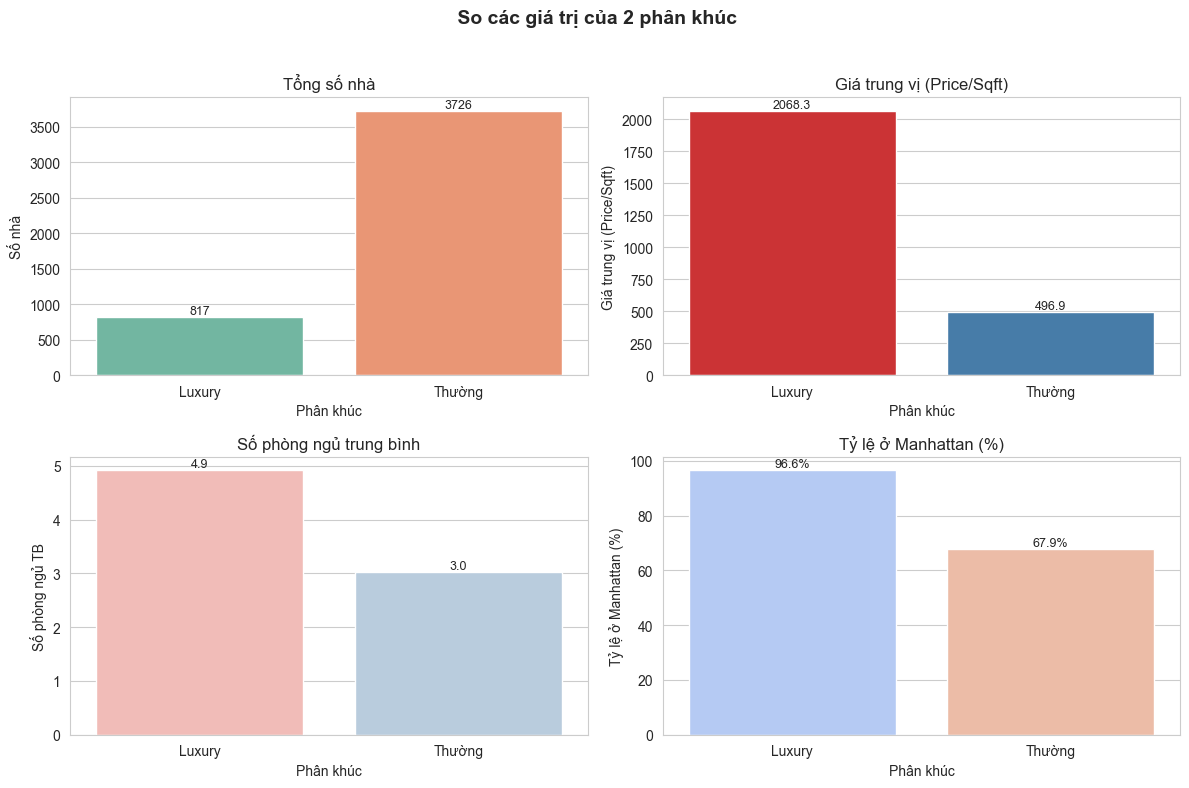

In [27]:

# Chu·∫©n b·ªã d·ªØ li·ªáu
summary_data = {
    "Ph√¢n kh√∫c": ["Luxury", "Th∆∞·ªùng"],
    "S·ªë nh√†": [len(df_luxury), len(df_normal)],
    "Gi√° trung v·ªã (Price/Sqft)": [df_luxury['PRICE_PER_SQFT'].mean(), 
                                  df_normal['PRICE_PER_SQFT'].mean()],
    "S·ªë ph√≤ng ng·ªß TB": [df_luxury['BEDS'].mean(), df_normal['BEDS'].mean()],
    "T·ª∑ l·ªá ·ªü Manhattan (%)": [
        df_luxury['BOROUGH'].str.contains('Manhattan').sum() / len(df_luxury) * 100,
        df_normal['BOROUGH'].str.contains('Manhattan').sum() / len(df_normal) * 100
    ]
}

# V·∫Ω bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(" So c√°c gi√° tr·ªã c·ªßa 2 ph√¢n kh√∫c", fontsize=14, fontweight='bold')

# 1. T·ªïng s·ªë nh√†
sns.barplot(x="Ph√¢n kh√∫c", y="S·ªë nh√†", data=summary_data, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("T·ªïng s·ªë nh√†")
for p in axes[0,0].patches:
    axes[0,0].annotate(f"{int(p.get_height())}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

# 2. Gi√° trung v·ªã
sns.barplot(x="Ph√¢n kh√∫c", y="Gi√° trung v·ªã (Price/Sqft)", data=summary_data, ax=axes[0,1], palette="Set1")
axes[0,1].set_title("Gi√° trung v·ªã (Price/Sqft)")
for p in axes[0,1].patches:
    axes[0,1].annotate(f"{p.get_height():.1f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

# 3. S·ªë ph√≤ng ng·ªß TB
sns.barplot(x="Ph√¢n kh√∫c", y="S·ªë ph√≤ng ng·ªß TB", data=summary_data, ax=axes[1,0], palette="Pastel1")
axes[1,0].set_title("S·ªë ph√≤ng ng·ªß trung b√¨nh")
for p in axes[1,0].patches:
    axes[1,0].annotate(f"{p.get_height():.1f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

# 4. T·ª∑ l·ªá ·ªü Manhattan
sns.barplot(x="Ph√¢n kh√∫c", y="T·ª∑ l·ªá ·ªü Manhattan (%)", data=summary_data, ax=axes[1,1], palette="coolwarm")
axes[1,1].set_title("T·ª∑ l·ªá ·ªü Manhattan (%)")
for p in axes[1,1].patches:
    axes[1,1].annotate(f"{p.get_height():.1f}%", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



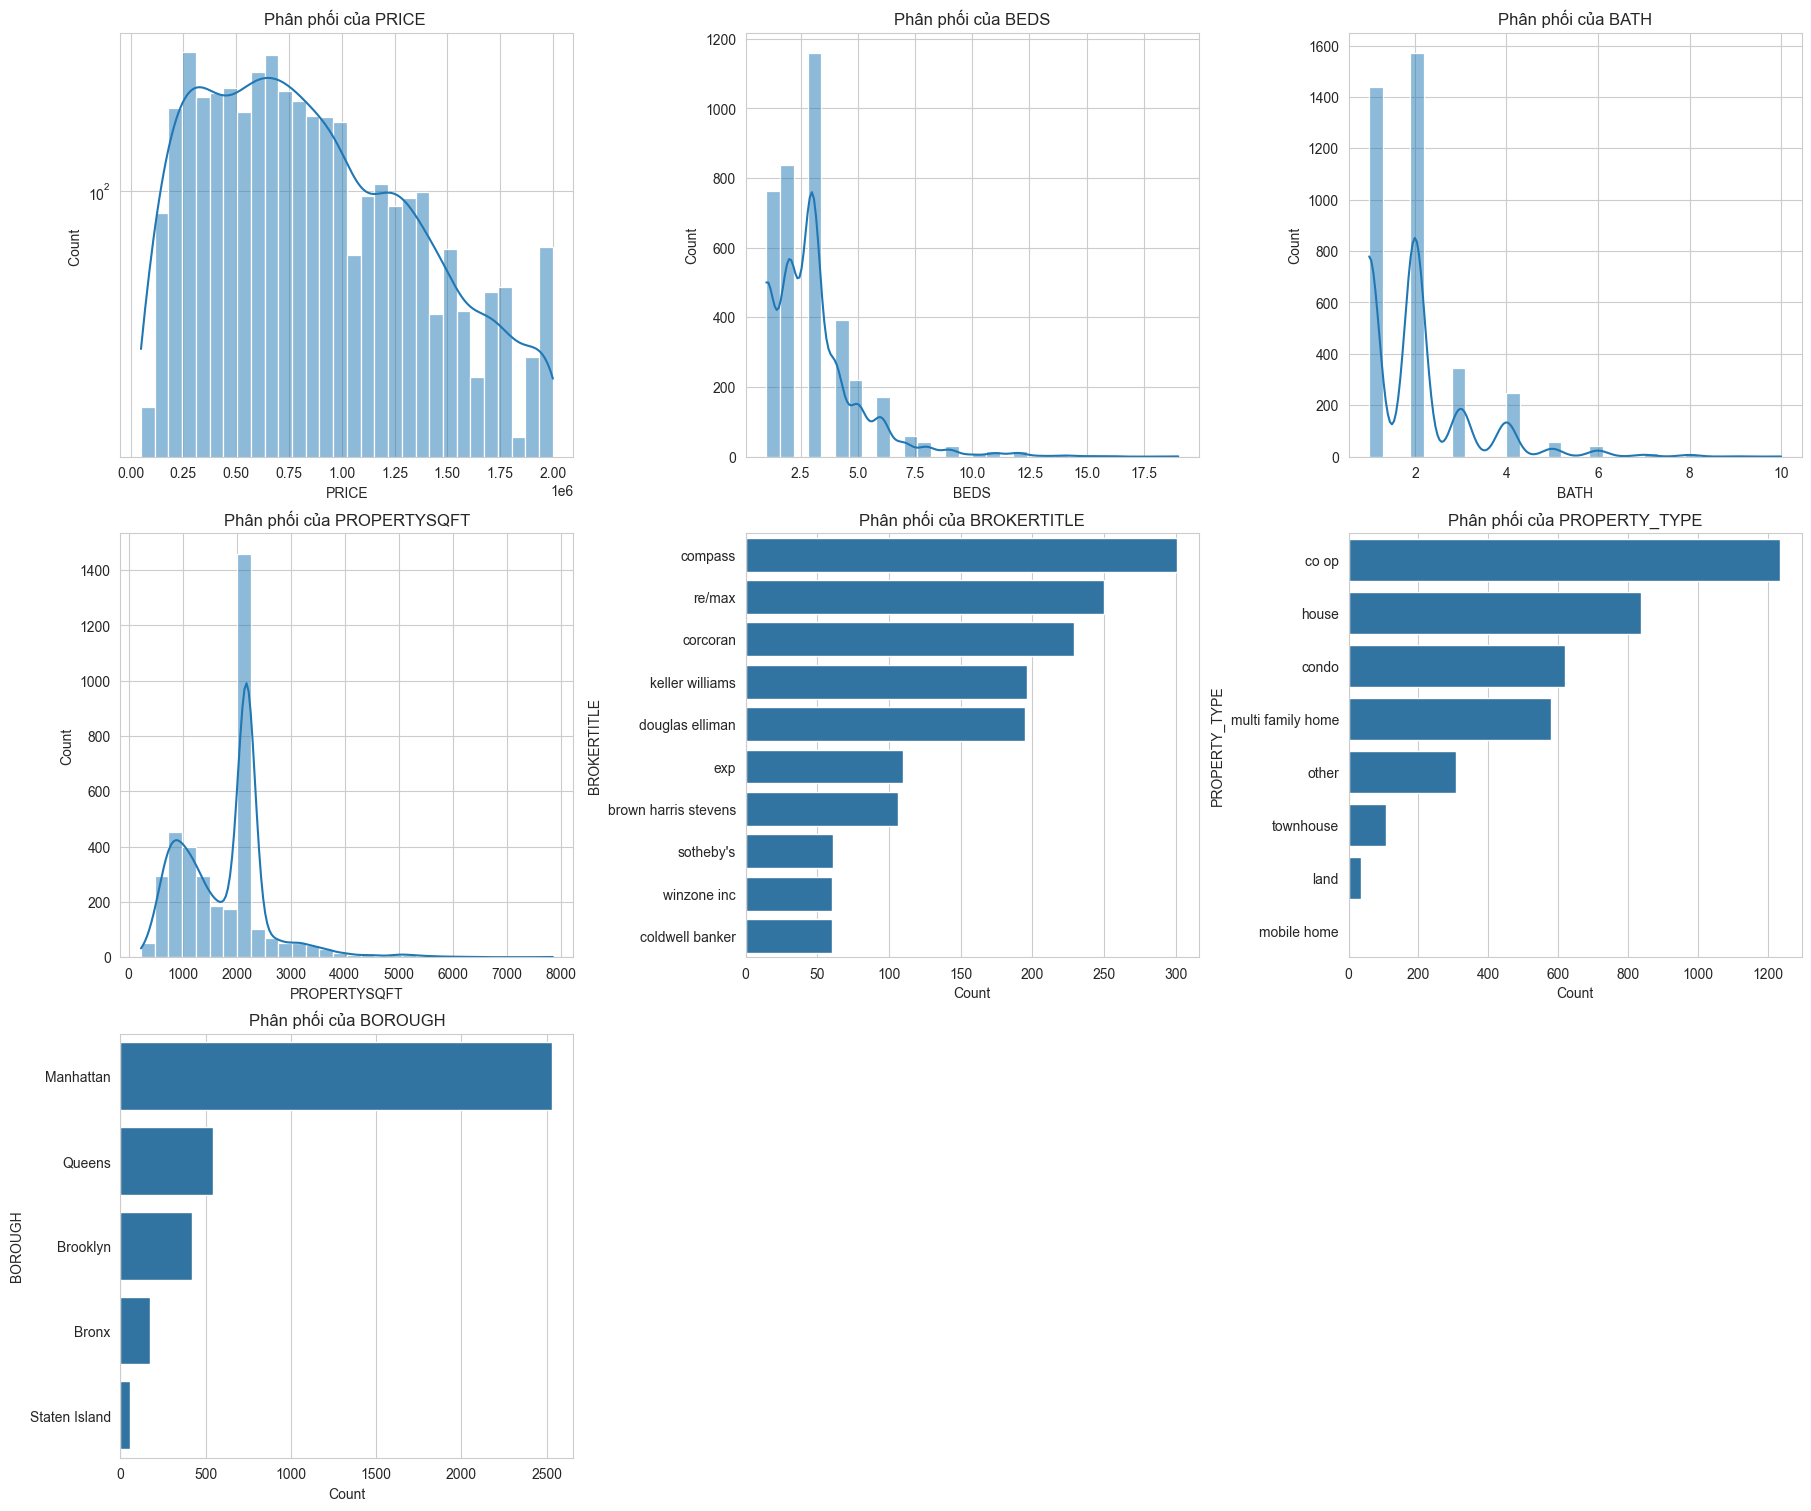

In [28]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} ')
            ax.set_ylabel('Count ')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

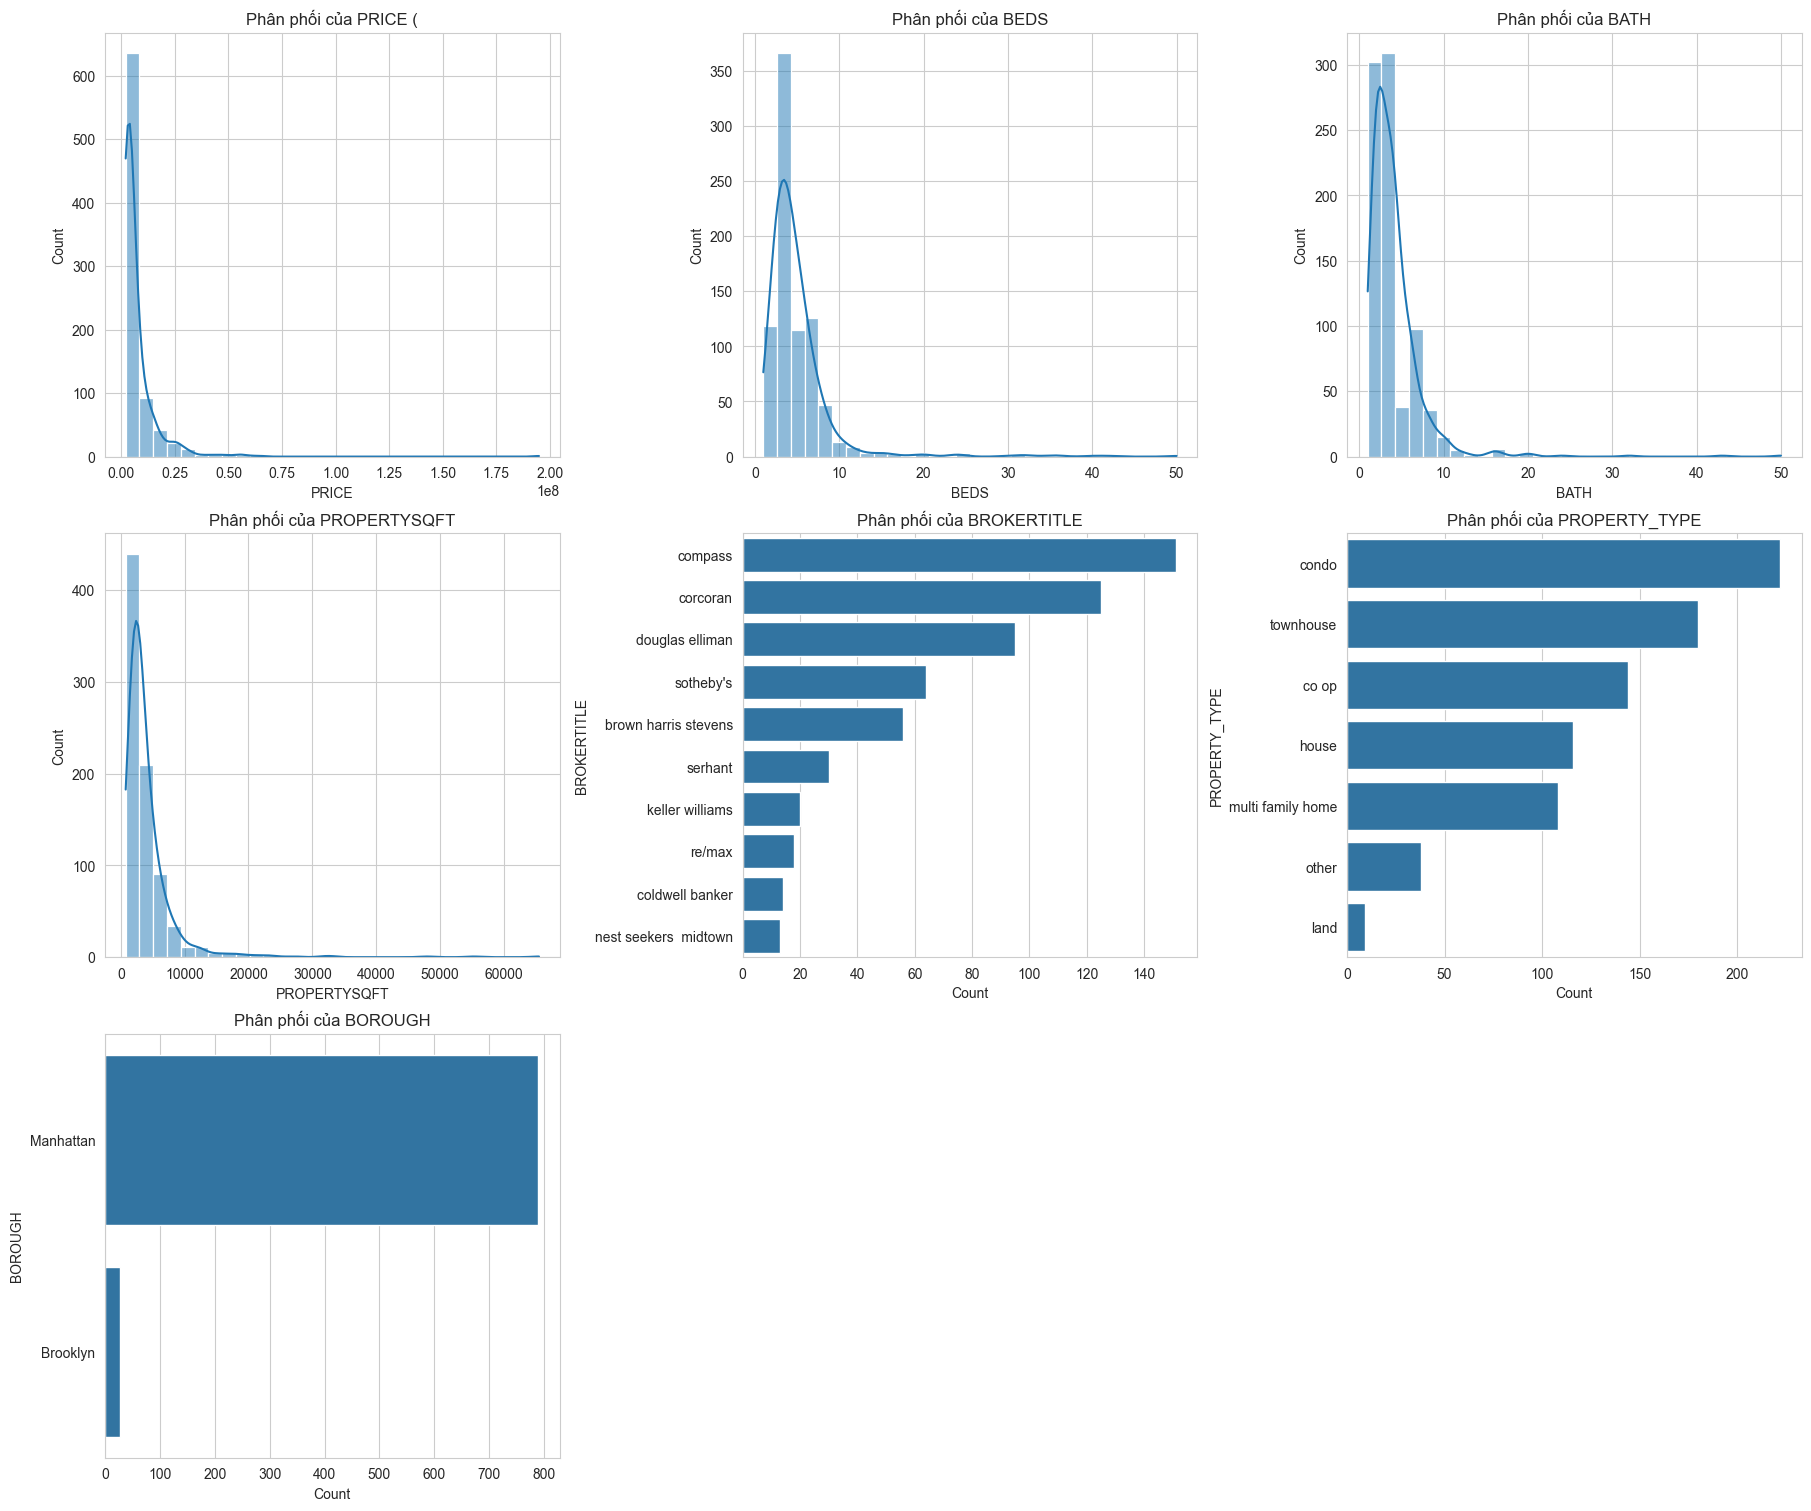

In [29]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (')
            ax.set_ylabel('Count')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Luxury c√≥ gi√° trung b√¨nh 5.7M c√≤n th∆∞·ªùng ch·∫Øc th·∫•p h∆°n nhi·ªÅu.

N·∫øu ch·ªâ nh√¨n b·∫£ng th√¨ ta th·∫•y ‚Äúluxury ƒë·∫Øt h∆°n‚Äù.

Nh∆∞ng ƒë·ªÉ ch·∫Øc ch·∫Øn, ta l√†m t-test so s√°nh gi√° gi·ªØa 2 ph√¢n kh√∫c.


In [30]:
t_stat, p_value = stats.ttest_ind(
    df_luxury['PRICE'], 
    df_normal['PRICE'], 
    equal_var=False  # Welch's t-test, an to√†n khi ph∆∞∆°ng sai 2 nh√≥m kh√°c nhau
)

print("So s√°nh gi√° trung b√¨nh gi·ªØa Luxury v√† Th∆∞·ªùng")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Luxury th·∫≠t s·ª± ƒë·∫Øt h∆°n th∆∞·ªùng v·ªõi √Ω nghƒ©a th·ªëng k√™ (p < 0.05).")
else:
    print("Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Luxury ƒë·∫Øt h∆°n th∆∞·ªùng.")

# B·∫°n c√≥ th·ªÉ ki·ªÉm ƒë·ªãnh t∆∞∆°ng t·ª± cho gi√°/m¬≤
t_stat_psqft, p_value_psqft = stats.ttest_ind(
    df_luxury['PRICE_PER_SQFT'], 
    df_normal['PRICE_PER_SQFT'], 
    equal_var=False
)

print("\nSo s√°nh gi√°/m¬≤ gi·ªØa Luxury v√† Th∆∞·ªùng")
print(f"T-statistic: {t_stat_psqft:.2f}")
print(f"P-value: {p_value_psqft:.5f}")

if p_value_psqft < 0.05:
    print("Luxury th·∫≠t s·ª± c√≥ gi√°/m¬≤ cao h∆°n v·ªõi √Ω nghƒ©a th·ªëng k√™.")
else:
    print(" Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Luxury c√≥ gi√°/m¬≤ cao h∆°n.")

So s√°nh gi√° trung b√¨nh gi·ªØa Luxury v√† Th∆∞·ªùng
T-statistic: 17.60
P-value: 0.00000
Luxury th·∫≠t s·ª± ƒë·∫Øt h∆°n th∆∞·ªùng v·ªõi √Ω nghƒ©a th·ªëng k√™ (p < 0.05).

So s√°nh gi√°/m¬≤ gi·ªØa Luxury v√† Th∆∞·ªùng
T-statistic: 19.47
P-value: 0.00000
Luxury th·∫≠t s·ª± c√≥ gi√°/m¬≤ cao h∆°n v·ªõi √Ω nghƒ©a th·ªëng k√™.


In [31]:
summary = {
    "Ch·ªâ s·ªë": [
        "Gi√° trung b√¨nh (Avg Price)",
        "Gi√° trung v·ªã (Median Price)",
        "Gi√°/m¬≤ trung b√¨nh (Avg PPSQFT)",
        "S·ªë ph√≤ng t·∫Øm trung b√¨nh (Avg Bath)",
        "S·ªë ph√≤ng ng·ªß trung b√¨nh (Avg Beds)",
        "Di·ªán t√≠ch trung b√¨nh (Avg SqFt)"
    ],
    "Ph√¢n kh√∫c Th∆∞·ªùng": [
        df_normal['PRICE'].mean(),
        df_normal['PRICE'].median(),
        df_normal['PRICE_PER_SQFT'].mean(),
        df_normal['BATH'].mean(),
        df_normal['BEDS'].mean(),
        df_normal['PROPERTYSQFT'].mean()
    ],
    "Ph√¢n kh√∫c Luxury": [
        df_luxury['PRICE'].mean(),
        df_luxury['PRICE'].median(),
        df_luxury['PRICE_PER_SQFT'].mean(),
        df_luxury['BATH'].mean(),
        df_luxury['BEDS'].mean(),
        df_luxury['PROPERTYSQFT'].mean()
    ]
}

comparison_df = pd.DataFrame(summary)

comparison_df["T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)"] = (
    comparison_df["Ph√¢n kh√∫c Luxury"] / comparison_df["Ph√¢n kh√∫c Th∆∞·ªùng"]
)

def format_value(val, is_price=False):
    if is_price:
        return f"${val:,.0f}"
    else:
        return f"{val:.1f}"

comparison_df["Ph√¢n kh√∫c Th∆∞·ªùng"] = [
    format_value(v, i < 2) for i, v in enumerate(summary["Ph√¢n kh√∫c Th∆∞·ªùng"])
]
comparison_df["Ph√¢n kh√∫c Luxury"] = [
    format_value(v, i < 2) for i, v in enumerate(summary["Ph√¢n kh√∫c Luxury"])
]
comparison_df["T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)"] = [
    f"{v:.1f}x" for v in comparison_df["T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)"]
]

print(comparison_df.to_string(index=False))


                            Ch·ªâ s·ªë Ph√¢n kh√∫c Th∆∞·ªùng Ph√¢n kh√∫c Luxury T·ª∑ l·ªá Ch√™nh l·ªách (Luxury/Th∆∞·ªùng)
        Gi√° trung b√¨nh (Avg Price)         $780,770       $7,099,559                             9.1x
       Gi√° trung v·ªã (Median Price)         $699,000       $3,900,000                             5.6x
    Gi√°/m¬≤ trung b√¨nh (Avg PPSQFT)            496.9           2068.3                             4.2x
S·ªë ph√≤ng t·∫Øm trung b√¨nh (Avg Bath)              2.0              4.1                             2.1x
S·ªë ph√≤ng ng·ªß trung b√¨nh (Avg Beds)              3.0              4.9                             1.6x
   Di·ªán t√≠ch trung b√¨nh (Avg SqFt)           1761.1           4072.7                             2.3x


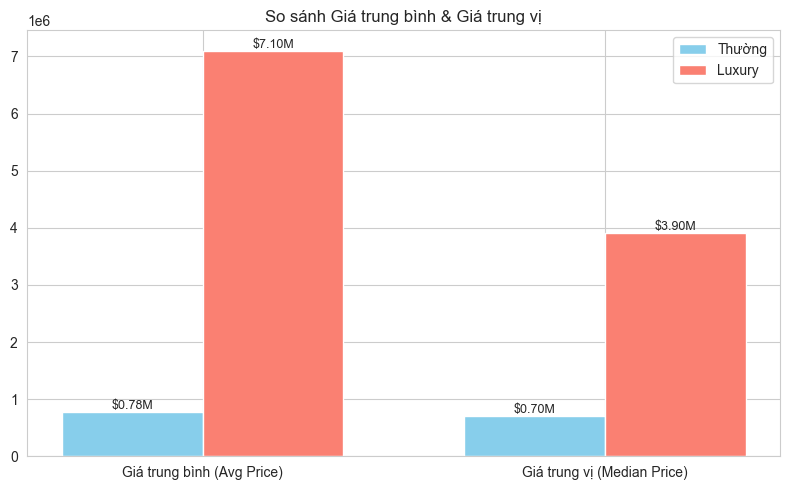

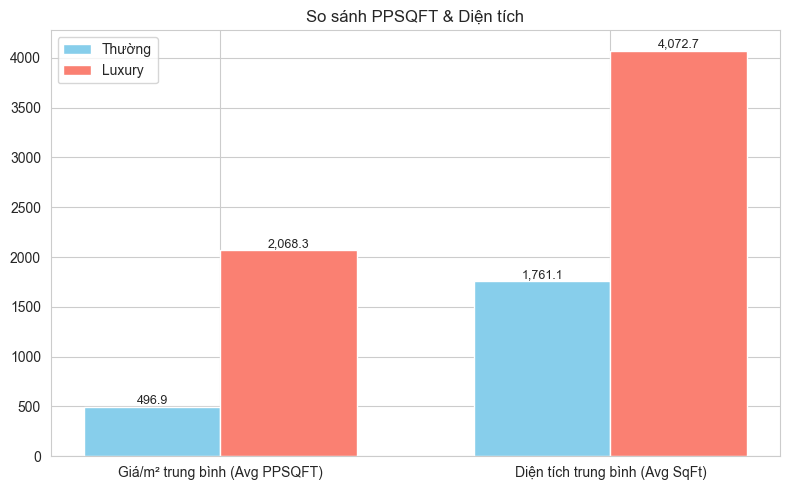

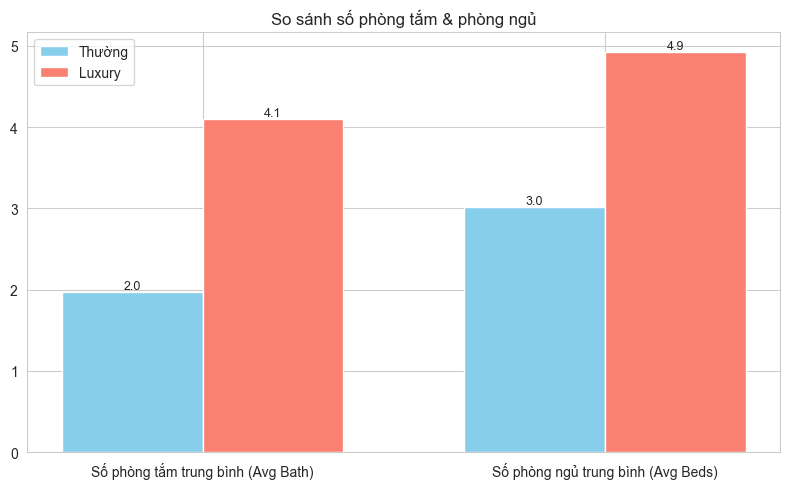

In [32]:
# Chu·∫©n b·ªã d·ªØ li·ªáu numeric ƒë·ªÉ d·ªÖ v·∫Ω
numeric_df = pd.DataFrame({
    "Ch·ªâ s·ªë": summary["Ch·ªâ s·ªë"],
    "Th∆∞·ªùng": summary["Ph√¢n kh√∫c Th∆∞·ªùng"],
    "Luxury": summary["Ph√¢n kh√∫c Luxury"]
})

width = 0.35

# --- Bi·ªÉu ƒë·ªì 1: Avg Price & Median Price ---
df_price = numeric_df[numeric_df["Ch·ªâ s·ªë"].isin([
    "Gi√° trung b√¨nh (Avg Price)",
    "Gi√° trung v·ªã (Median Price)"
])]
fig, ax = plt.subplots(figsize=(8,5))
x = range(len(df_price))

ax.bar([i - width/2 for i in x], df_price["Th∆∞·ªùng"], width, label="Th∆∞·ªùng", color="skyblue")
ax.bar([i + width/2 for i in x], df_price["Luxury"], width, label="Luxury", color="salmon")

# Nh√£n gi√° tr·ªã
for i, v in enumerate(df_price["Th∆∞·ªùng"]):
    ax.text(i - width/2, v, f"${v/1e6:.2f}M", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(df_price["Luxury"]):
    ax.text(i + width/2, v, f"${v/1e6:.2f}M", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df_price["Ch·ªâ s·ªë"])
ax.set_title("So s√°nh Gi√° trung b√¨nh & Gi√° trung v·ªã")
ax.legend()
plt.tight_layout()
plt.show()


# --- Bi·ªÉu ƒë·ªì 2: PPSQFT & Di·ªán t√≠ch ---
df_area = numeric_df[numeric_df["Ch·ªâ s·ªë"].isin([
    "Gi√°/m¬≤ trung b√¨nh (Avg PPSQFT)",
    "Di·ªán t√≠ch trung b√¨nh (Avg SqFt)"
])]
fig, ax = plt.subplots(figsize=(8,5))
x = range(len(df_area))

ax.bar([i - width/2 for i in x], df_area["Th∆∞·ªùng"], width, label="Th∆∞·ªùng", color="skyblue")
ax.bar([i + width/2 for i in x], df_area["Luxury"], width, label="Luxury", color="salmon")

for i, v in enumerate(df_area["Th∆∞·ªùng"]):
    ax.text(i - width/2, v, f"{v:,.1f}", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(df_area["Luxury"]):
    ax.text(i + width/2, v, f"{v:,.1f}", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df_area["Ch·ªâ s·ªë"])
ax.set_title("So s√°nh PPSQFT & Di·ªán t√≠ch")
ax.legend()
plt.tight_layout()
plt.show()


# --- Bi·ªÉu ƒë·ªì 3: Bath & Beds ---
df_rooms = numeric_df[numeric_df["Ch·ªâ s·ªë"].isin([
    "S·ªë ph√≤ng t·∫Øm trung b√¨nh (Avg Bath)",
    "S·ªë ph√≤ng ng·ªß trung b√¨nh (Avg Beds)"
])]
fig, ax = plt.subplots(figsize=(8,5))
x = range(len(df_rooms))

ax.bar([i - width/2 for i in x], df_rooms["Th∆∞·ªùng"], width, label="Th∆∞·ªùng", color="skyblue")
ax.bar([i + width/2 for i in x], df_rooms["Luxury"], width, label="Luxury", color="salmon")

for i, v in enumerate(df_rooms["Th∆∞·ªùng"]):
    ax.text(i - width/2, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(df_rooms["Luxury"]):
    ax.text(i + width/2, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df_rooms["Ch·ªâ s·ªë"])
ax.set_title("So s√°nh s·ªë ph√≤ng t·∫Øm & ph√≤ng ng·ªß")
ax.legend()
plt.tight_layout()
plt.show()


##  Gi√° b√°n  
- Luxury ƒë·∫Øt **7.6x** th∆∞·ªùng, di·ªán t√≠ch ch·ªâ **1.8x** ‚Üí kh√°ch h√†ng tr·∫£ ti·ªÅn cho **gi√° tr·ªã v√¥ h√¨nh** (v·ªã tr√≠, ti·ªán √≠ch, th∆∞∆°ng hi·ªáu, sang tr·ªçng).  

##  Gi√°/m¬≤ (PPSQFT)  
- Luxury cao h∆°n **4.3x** th∆∞·ªùng ‚Üí gi√° tr·ªã m·ªói m¬≤ ph·∫£n √°nh **ƒë·∫≥ng c·∫•p tr√™n m·ªói m√©t vu√¥ng**, kh√¥ng t·ª∑ l·ªá thu·∫≠n di·ªán t√≠ch.  

##  Ph√≤ng t·∫Øm &  Ph√≤ng ng·ªß  
- Ph√≤ng t·∫Øm **1.8x**, ph√≤ng ng·ªß **1.4x** ‚Üí ∆Øu ti√™n **ti·ªán nghi c√° nh√¢n (bathroom)** quan tr·ªçng h∆°n kh·∫£ nƒÉng ch·ª©a ng∆∞·ªùi (bedroom) trong ph√¢n kh√∫c sang tr·ªçng.

##  Di·ªán t√≠ch  
- Luxury l·ªõn h∆°n **1.8x**, nh∆∞ng gi√° **7.6x** ‚Üí di·ªán t√≠ch ch·ªâ l√† **m·ªôt ph·∫ßn nh·ªè**, y·∫øu t·ªë v√¥ h√¨nh m·ªõi ƒë·∫©y gi√°.  

##  T√≥m l·∫°i  
Luxury = **di·ªán t√≠ch + v·ªã tr√≠ + ti·ªán nghi + tr·∫£i nghi·ªám s·ªëng ƒë·∫≥ng c·∫•p**, khi·∫øn kh√°ch h√†ng **s·∫µn s√†ng tr·∫£ g·∫•p nhi·ªÅu l·∫ßn**.  


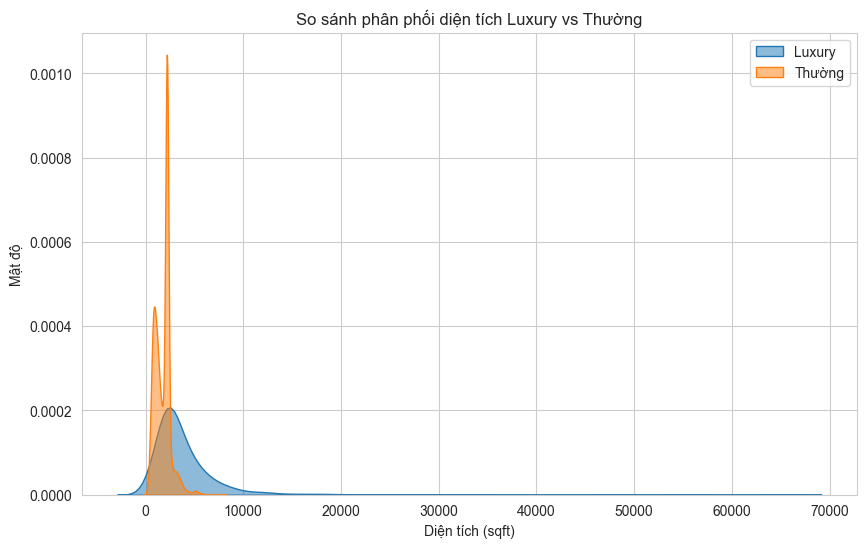

So s√°nh di·ªán t√≠ch trung b√¨nh (PROPERTYSQFT) gi·ªØa Luxury v√† Th∆∞·ªùng
T-statistic: 14.11
P-value: 0.00000
Luxury c√≥ di·ªán t√≠ch trung b√¨nh kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi Th∆∞·ªùng (p < 0.05).


In [33]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_luxury['PROPERTYSQFT'], label='Luxury', fill=True, alpha=0.5)
sns.kdeplot(df_normal['PROPERTYSQFT'], label='Th∆∞·ªùng', fill=True, alpha=0.5)
plt.xlabel('Di·ªán t√≠ch (sqft)')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.title('So s√°nh ph√¢n ph·ªëi di·ªán t√≠ch Luxury vs Th∆∞·ªùng')
plt.legend()
plt.show()

# --- Th·ª±c hi·ªán t-test ---
t_stat, p_value = stats.ttest_ind(df_luxury['PROPERTYSQFT'], df_normal['PROPERTYSQFT'], equal_var=False)

print("So s√°nh di·ªán t√≠ch trung b√¨nh (PROPERTYSQFT) gi·ªØa Luxury v√† Th∆∞·ªùng")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Luxury c√≥ di·ªán t√≠ch trung b√¨nh kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi Th∆∞·ªùng (p < 0.05).")
else:
    print("Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Luxury kh√°c bi·ªát di·ªán t√≠ch so v·ªõi Th∆∞·ªùng.")

In [34]:
def property_type_stats(df, name):
    counts = df['PROPERTY_TYPE'].value_counts(normalize=True) * 100
    return pd.DataFrame({
        f'{name}_count': df['PROPERTY_TYPE'].value_counts(),
        f'{name}_percent': counts.round(2)
    })

std_property = property_type_stats(df_normal, 'Standard')
lux_property = property_type_stats(df_luxury, 'Luxury')

property_compare = pd.concat([std_property, lux_property], axis=1).fillna(0)

print("üìä So s√°nh lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n (PROPERTY_TYPE):")
display(property_compare)


# 2Ô∏è‚É£ Ph√¢n b·ªë ƒë·ªãa l√Ω theo BOROUGH
def borough_stats(df, name):
    counts = df['BOROUGH'].value_counts(normalize=True) * 100
    return pd.DataFrame({
        f'{name}_count': df['BOROUGH'].value_counts(),
        f'{name}_percent': counts.round(2)
    })

std_borough = borough_stats(df_normal, 'Standard')
lux_borough = borough_stats(df_luxury, 'Luxury')

borough_compare = pd.concat([std_borough, lux_borough], axis=1).fillna(0)

print("\nüìç So s√°nh theo BOROUGH:")
display(borough_compare)




üìä So s√°nh lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n (PROPERTY_TYPE):


Standard_count  Standard_percent  Luxury_count  \
PROPERTY_TYPE                                                       
co op                        1236             33.17        144.00   
house                         837             22.46        116.00   
condo                         621             16.67        222.00   
multi family home             580             15.57        108.00   
other                         309              8.29         38.00   
townhouse                     107              2.87        180.00   
land                           35              0.94          9.00   
mobile home                     1              0.03          0.00   

                   Luxury_percent  
PROPERTY_TYPE                      
co op                       17.63  
house                       14.20  
condo                       27.17  
multi family home           13.22  
other                        4.65  
townhouse                   22.03  
land                         1.10  
mobile home                  0.00


üìç So s√°nh theo BOROUGH:


Standard_count  Standard_percent  Luxury_count  Luxury_percent
BOROUGH                                                                      
Manhattan                2531             67.93        789.00           96.57
Queens                    542             14.55          0.00            0.00
Brooklyn                  419             11.25         28.00            3.43
Bronx                     176              4.72          0.00            0.00
Staten Island              58              1.56          0.00            0.00

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3510488990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(small, 'Other')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3510488990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(small, 'Other')


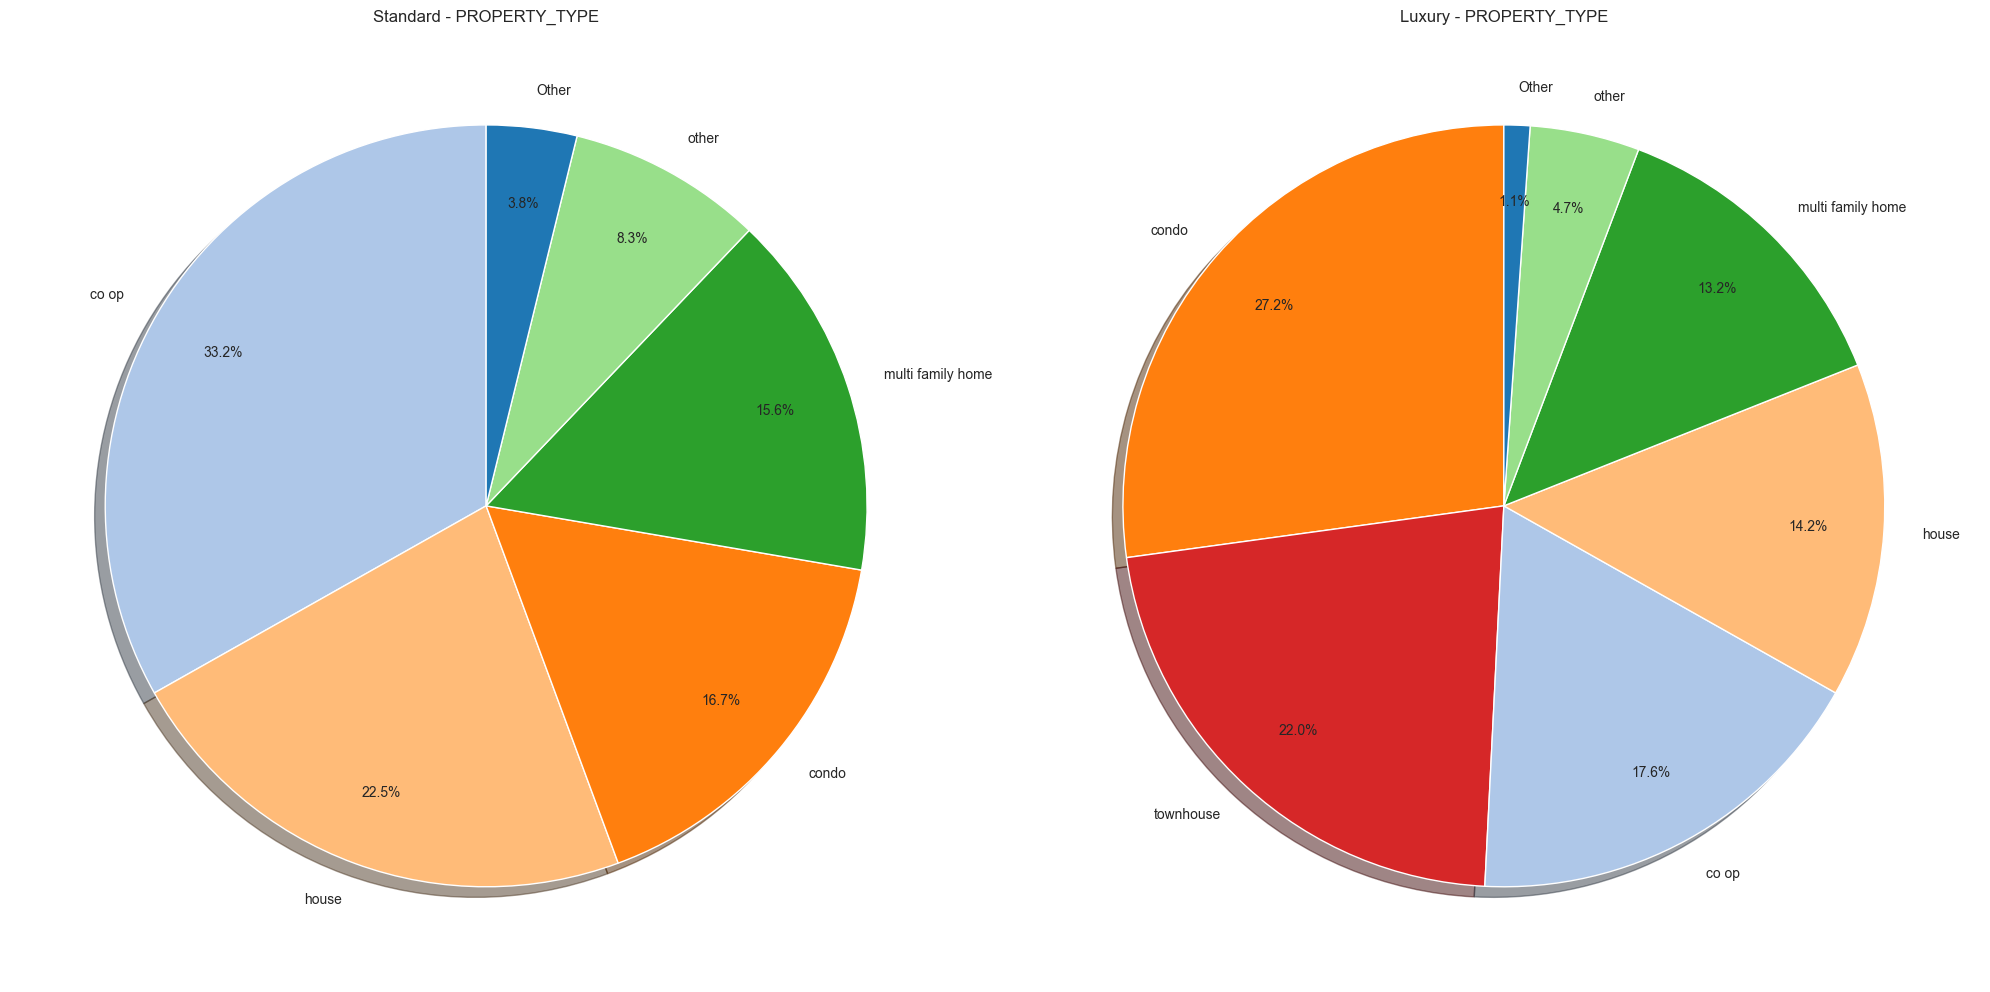

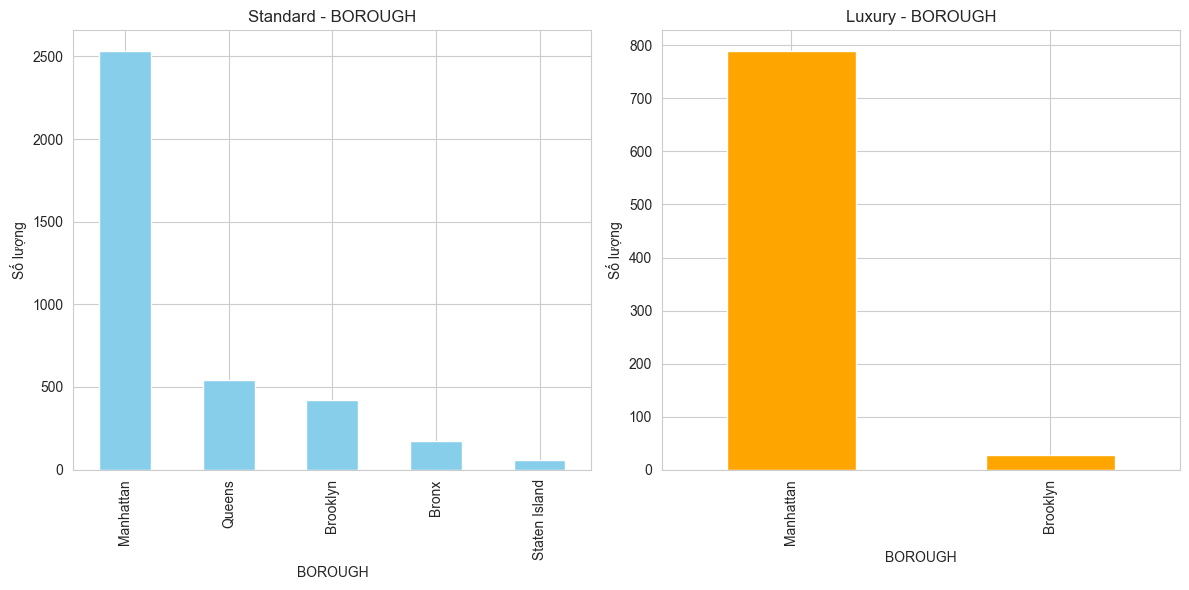

In [35]:
def group_small(df, column, threshold=0.03):
    counts = df[column].value_counts(normalize=True)
    small = counts[counts < threshold].index
    df[column] = df[column].replace(small, 'Other')
    return df

df_normal = group_small(df_normal, 'PROPERTY_TYPE')
df_luxury = group_small(df_luxury, 'PROPERTY_TYPE')

# T·∫°o m√†u c·ªë ƒë·ªãnh cho t·ª´ng category
all_categories = sorted(list(set(df_normal['PROPERTY_TYPE'].unique()) | set(df_luxury['PROPERTY_TYPE'].unique())))
colors = plt.cm.tab20.colors  # l·∫•y 20 m√†u chu·∫©n
color_dict = {cat: colors[i % len(colors)] for i, cat in enumerate(all_categories)}

# H√†m l·ªçc hi·ªÉn th·ªã % >1%
def autopct_filter(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# V·∫Ω 2 pie chart c√πng m√†u cho c√πng category
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_normal_counts = df_normal['PROPERTY_TYPE'].value_counts()
df_normal_counts.plot.pie(
    autopct=autopct_filter,
    ax=axes[0],
    startangle=90,
    shadow=True,
    colors=[color_dict[i] for i in df_normal_counts.index],
    labeldistance=1.1,
    pctdistance=0.8
)
axes[0].set_title("Standard - PROPERTY_TYPE")
axes[0].set_ylabel("")

df_luxury_counts = df_luxury['PROPERTY_TYPE'].value_counts()
df_luxury_counts.plot.pie(
    autopct=autopct_filter,
    ax=axes[1],
    startangle=90,
    shadow=True,
    colors=[color_dict[i] for i in df_luxury_counts.index],
    labeldistance=1.1,
    pctdistance=0.8
)
axes[1].set_title("Luxury - PROPERTY_TYPE")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# 2Ô∏è‚É£ BOROUGH
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_normal['BOROUGH'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("Standard - BOROUGH")
axes[0].set_ylabel("S·ªë l∆∞·ª£ng")

df_luxury['BOROUGH'].value_counts().plot.bar(ax=axes[1], color='orange')
axes[1].set_title("Luxury - BOROUGH")
axes[1].set_ylabel("S·ªë l∆∞·ª£ng")

plt.tight_layout()
plt.show()




### 1. Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n (PROPERTY_TYPE)
- **Normal**: ch·ªß y·∫øu l√† **Co-op (34.4%)** v√† **House (23.6%)** ‚Üí l·ª±a ch·ªçn truy·ªÅn th·ªëng, ph·ªï bi·∫øn.  
- **Luxury**: thi√™n v·ªÅ **Condo (36.2%)** v√† **Townhouse (16.9%)**, cao g·∫•p **3‚Äì5 l·∫ßn t·ª∑ tr·ªçng Normal**.  
- **Co-op** gi·∫£m m·∫°nh (34.4% ‚Üí 17.2%) v√¨ kh√¥ng h·ª£p gu kh√°ch h√†ng gi√†u, v·ªën ∆∞u ti√™n **ri√™ng t∆∞ & to√†n quy·ªÅn s·ªü h·ªØu**.  

üëâ **K·∫øt lu·∫≠n:** Normal = ‚Äúnh√† ·ªü ƒë·∫°i ch√∫ng‚Äù | Luxury = ‚ÄúcƒÉn h·ªô & townhouse sang tr·ªçng‚Äù.

---

### 2. Ph√¢n b·ªë ƒë·ªãa l√Ω (BOROUGH)
- **Manhattan** √°p ƒë·∫£o Luxury (**90.6% vs 67.7% Normal**) ‚Üí trung t√¢m c·ªßa b·∫•t ƒë·ªông s·∫£n h·∫°ng sang.  
- **Queens** (15.3% ‚Üí 1.0%) v√† **Bronx** (5.0% ‚Üí 0.1%) g·∫ßn nh∆∞ bi·∫øn m·∫•t kh·ªèi Luxury ‚Üí s√¢n ch∆°i c·ªßa th·ªã tr∆∞·ªùng t·∫ßm trung.  
- **Brooklyn** gi·ªØ vai tr√≤ trung gian (**10.3% vs 8.3%**) ‚Üí c√≥ s·ª©c h√∫t, nh∆∞ng ch∆∞a c·∫°nh tranh ƒë∆∞·ª£c v·ªõi Manhattan.  

üëâ **K·∫øt lu·∫≠n:** Luxury t·∫≠p trung g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi ·ªü Manhattan; Normal ph√¢n b·ªï ƒëa d·∫°ng h∆°n.

---

### üìå Insight t·ªïng h·ª£p
Luxury kh√¥ng ch·ªâ **‚Äúto h∆°n‚Äù** m√† c√≤n:  
- ·ªû **v·ªã tr√≠ ƒë·∫≥ng c·∫•p h∆°n** (Manhattan)  
- Thu·ªôc **lo·∫°i h√¨nh kh√°c bi·ªát h∆°n** (Condo, Townhouse)  

=> **DNA c·ªßa Luxury = Manhattan + Condo/Townhouse**  
Trong khi ƒë√≥, Normal g·∫Øn v·ªõi **Co-op/House** tr·∫£i r·ªông ·ªü nhi·ªÅu qu·∫≠n.  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\2220753960.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()


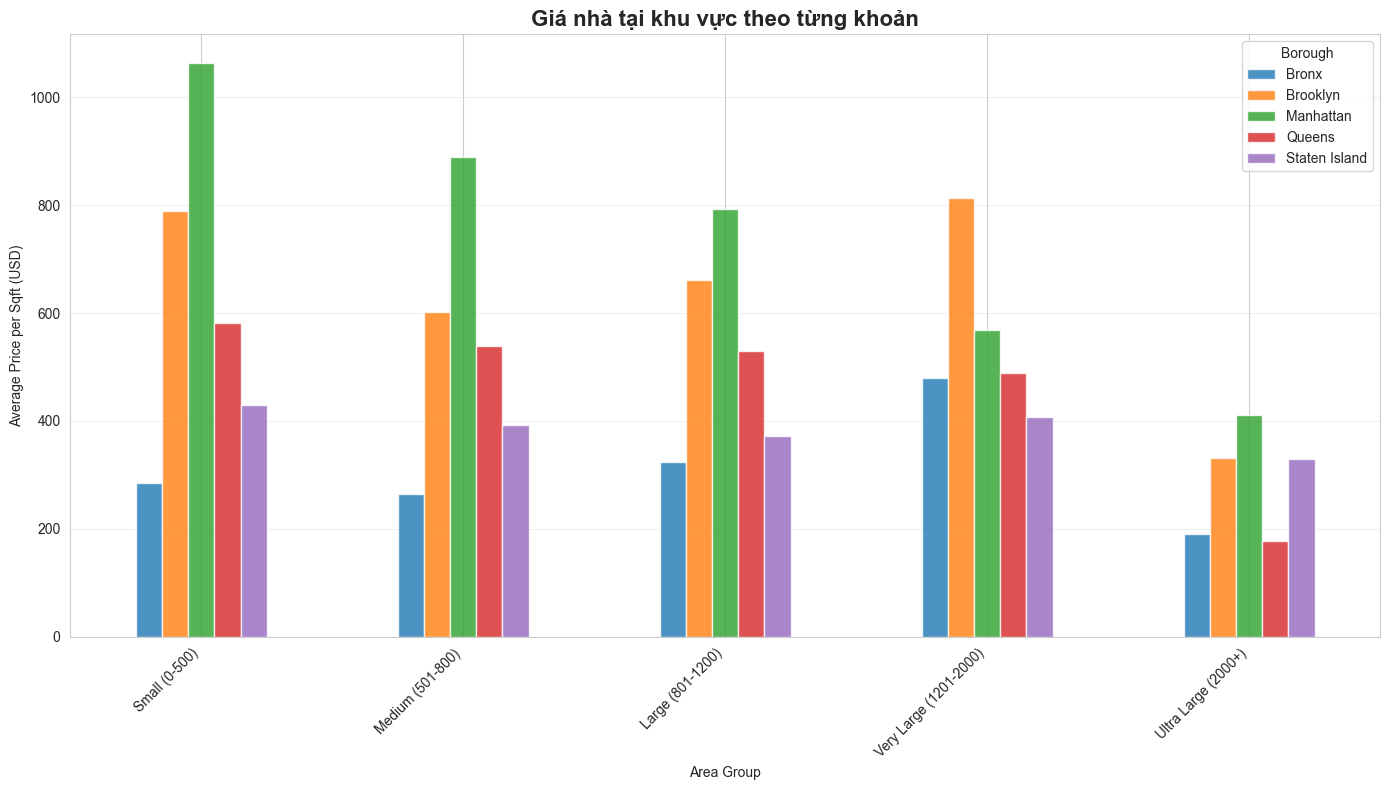

AreaGroup      Small (0-500)  Medium (501-800)  Large (801-1200)  \
BOROUGH                                                            
Bronx                 285.00            265.06            324.42   
Brooklyn              789.19            600.96            661.69   
Manhattan           1,062.87            888.98            793.36   
Queens                580.88            538.91            529.74   
Staten Island         429.24            392.00            372.26   

AreaGroup      Very Large (1201-2000)  Ultra Large (2000+)  
BOROUGH                                                     
Bronx                          479.59               191.07  
Brooklyn                       812.19               332.14  
Manhattan                      568.59               410.40  
Queens                         488.92               176.96  
Staten Island                  406.43               330.15

In [36]:

df_clean = df_normal.copy()

df_clean = df_clean.dropna(subset=['PRICE_PER_SQFT'])
df_clean = df_clean[df_clean['PRICE_PER_SQFT'] > 0]

df_clean['AreaGroup'] = pd.cut(
    df_clean['PROPERTYSQFT'],
    bins=[0, 500, 800, 1200, 2000, float('inf')],
    labels=['Small (0-500)', 'Medium (501-800)', 'Large (801-1200)', 
            'Very Large (1201-2000)', 'Ultra Large (2000+)']
)

price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

price_sqft_grouped.T.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title("Gi√° nh√† t·∫°i khu v·ª±c theo t·ª´ng kho·∫£n", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)")
plt.xlabel("Area Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

display(price_sqft_grouped.round(2))


Manhattan & Brooklyn l√† hai th·ªã tr∆∞·ªùng cao c·∫•p nh·∫•t: Gi√° tr√™n m·ªói foot vu√¥ng ($/sqft) c·ªßa hai qu·∫≠n n√†y lu√¥n cao nh·∫•t ·ªü m·ªçi ph√¢n kh√∫c di·ªán t√≠ch, ph·∫£n √°nh s·ª©c h√∫t v√† s·ª± c·∫°nh tranh kh·ªëc li·ªát.

Quy lu·∫≠t "Gi·∫£m gi√° theo di·ªán t√≠ch" (Discount for Bulk): ·ªû h·∫ßu h·∫øt c√°c qu·∫≠n, cƒÉn c√†ng l·ªõn, gi√° m·ªói sqft c√†ng r·∫ª. ƒêi·ªÅu n√†y cho th·∫•y th·ªã tr∆∞·ªùng c√≥ "chi·∫øt kh·∫•u" khi mua di·ªán t√≠ch l·ªõn.

V√≠ d·ª• ƒëi·ªÉn h√¨nh: T·∫°i Manhattan, gi√°/sqft gi·∫£m ~33% t·ª´ nh√≥m "Small" ($644) xu·ªëng "Ultra Large" ($433).

Ngo·∫°i l·ªá ƒë√°ng ch√∫ √Ω: The Bronx l√† qu·∫≠n DUY NH·∫§T c√≥ xu h∆∞·ªõng ng∆∞·ª£c l·∫°i. Gi√°/sqft ·ªü ƒë√¢y tƒÉng m·∫°nh ·ªü c√°c nh√≥m di·ªán t√≠ch l·ªõn. ƒêi·ªÅu n√†y c√≥ th·ªÉ do ngu·ªìn cung c√°c b·∫•t ƒë·ªông s·∫£n l·ªõn, ƒë·∫πp t·∫°i Bronx r·∫•t khan hi·∫øm v√† c√≥ gi√° tr·ªã ƒë·∫ßu t∆∞ cao, trong khi c√°c cƒÉn nh·ªè th∆∞·ªùng l√† c√°c apartment c≈© gi√° r·∫ª.

In [37]:
# Gi√° trung b√¨nh / sqft theo qu·∫≠n & nh√≥m di·ªán t√≠ch
price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

print("Average Price per Sqft by Borough and Area Group:")
print(price_sqft_grouped.round(2))

# T√≠nh t·ª∑ l·ªá % thay ƒë·ªïi gi·ªØa c√°c nh√≥m di·ªán t√≠ch
price_sqft_change = price_sqft_grouped.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
AreaGroup      Small (0-500)  Medium (501-800)  Large (801-1200)  \
BOROUGH                                                            
Bronx                 285.00            265.06            324.42   
Brooklyn              789.19            600.96            661.69   
Manhattan           1,062.87            888.98            793.36   
Queens                580.88            538.91            529.74   
Staten Island         429.24            392.00            372.26   

AreaGroup      Very Large (1201-2000)  Ultra Large (2000+)  
BOROUGH                                                     
Bronx                          479.59               191.07  
Brooklyn                       812.19               332.14  
Manhattan                      568.59               410.40  
Queens                         488.92               176.96  
Staten Island                  406.43               330.15  

Percentage change compared to previous Area G

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\683740668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()


Co-op l√† l·ª±a ch·ªçn ti·∫øt ki·ªám chi ph√≠: ·ªû m·ªçi ph√¢n kh√∫c di·ªán t√≠ch, Co-op lu√¥n c√≥ gi√° trung b√¨nh th·∫•p h∆°n Condo m·ªôt c√°ch r√µ r·ªát. ƒêi·ªÅu n√†y kh·∫≥ng ƒë·ªãnh ƒë·∫∑c ƒëi·ªÉm c·ªßa th·ªã tr∆∞·ªùng NYC: Co-op r·∫ª h∆°n nh∆∞ng ƒëi k√®m nhi·ªÅu quy ƒë·ªãnh ch·∫∑t ch·∫Ω h∆°n.

S·ª± "l√™n ng√¥i" c·ªßa nh√† ri√™ng (House) v√† Multi Family Home ·ªü ph√¢n kh√∫c l·ªõn: ·ªû nh√≥m "Large" tr·ªü l√™n, gi√° c·ªßa House v√† Multi Family Home tƒÉng v·ªçt v√† v∆∞·ª£t qua Condo. ƒêi·ªÅu n√†y cho th·∫•y vi·ªác s·ªü h·ªØu m·ªôt ng√¥i nh√† nguy√™n cƒÉn ho·∫∑c m·ªôt t√≤a nh√† cho thu√™ (m·ªôt d·∫°ng b·∫•t ƒë·ªông s·∫£n ƒë·∫ßu t∆∞) ·ªü NYC c√≥ gi√° tr·ªã r·∫•t l·ªõn v√† l√† ph√¢n kh√∫c c·ªßa c√°c nh√† ƒë·∫ßu t∆∞ ho·∫∑c gia ƒë√¨nh gi√†u c√≥.

In [39]:

# print("Average Price per Sqft by Borough and Area Group:")
# print(price_by_area_type.round(2))

# # T√≠nh t·ª∑ l·ªá % thay ƒë·ªïi gi·ªØa c√°c nh√≥m di·ªán t√≠ch
# price_sqft_change = price_by_area_type.pct_change(axis=1) * 100

# print("\nPercentage change compared to previous Area Group:")
# print(price_sqft_change.fillna('-').round(1))


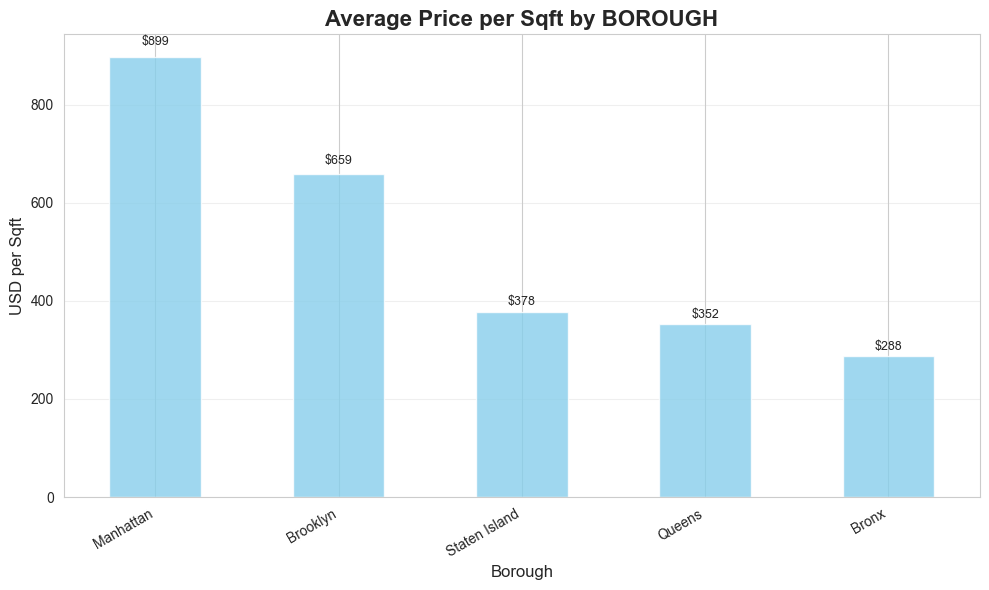

BOROUGH
Manhattan       898.58
Brooklyn        659.08
Staten Island   378.33
Queens          352.07
Bronx           288.40
Name: PRICE_PER_SQFT, dtype: float64


In [40]:
avg_price_sqft_by_borough = df.groupby('BOROUGH')['PRICE_PER_SQFT'].mean().sort_values(ascending=False)

# V·∫Ω bar chart
plt.figure(figsize=(10,6))
avg_price_sqft_by_borough.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Average Price per Sqft by BOROUGH", fontsize=16, fontweight='bold')
plt.ylabel("USD per Sqft", fontsize=12)
plt.xlabel("Borough", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# Th√™m label gi√° tr√™n c·ªôt
for i, val in enumerate(avg_price_sqft_by_borough):
    plt.text(i, val * 1.02, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# In b·∫£ng gi√° trung b√¨nh
print(avg_price_sqft_by_borough.round(2))


## üîç Insight ch√≠nh
1. **Manhattan th·ªëng tr·ªã**: gi√° g·∫•p 3.1 l·∫ßn Bronx, g·∫ßn g·∫•p ƒë√¥i Brooklyn ‚Üí trung t√¢m luxury.  
2. **Brooklyn v∆∞∆°n l√™n premium**: nhi·ªÅu khu gi√° ti·ªám c·∫≠n Manhattan, h√∫t gi·ªõi tr·∫ª & gia ƒë√¨nh kh√° gi·∫£.  
3. **Kho·∫£ng c√°ch l·ªõn**: ch√™nh l·ªách Manhattan ‚Äì Bronx t·ªõi $610/sqft ‚Üí ph·∫£n √°nh r√µ ph√¢n t·∫ßng thu nh·∫≠p & h·∫° t·∫ßng.  
4. **Ba qu·∫≠n ngo·∫°i vi (Queens, Bronx, Staten Island)** gi√° g·∫ßn nhau ($288‚Äì378/sqft) ‚Üí ph√π h·ª£p ng∆∞·ªùi mua l·∫ßn ƒë·∫ßu.  
5. **Ph√¢n kh√∫c r√µ r·ªát**:  
   - Si√™u cao c·∫•p: Manhattan  
   - Cao c·∫•p: Brooklyn  
   - Trung b√¨nh: Staten Island  
   - B√¨nh d√¢n: Queens & Bronx  

---

## üí° Khuy·∫øn ngh·ªã
- **ƒê·∫ßu t∆∞**: Brooklyn c√≥ ti·ªÅm nƒÉng tƒÉng gi√°.  
- **Ng∆∞·ªùi mua ·ªü**: n√™n xem Queens & Bronx.  
- **Ph√°t tri·ªÉn d·ª± √°n**: Staten Island l√† th·ªã tr∆∞·ªùng ti·ªÅm nƒÉng.

C√≥ 96 gi√° tr·ªã di·ªán t√≠ch xu·∫•t hi·ªán t·ª´ 5 l·∫ßn tr·ªü l√™n.
Top 10 di·ªán t√≠ch ph·ªï bi·∫øn nh·∫•t:


PROPERTYSQFT  COUNT
0      2,184.21   1525
1        800.00     53
2        750.00     51
3        900.00     50
4      1,200.00     47
5      1,000.00     40
6        850.00     38
7      1,100.00     38
8      2,000.00     28
9        950.00     28

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1306940514.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_areas.head(15), x='PROPERTYSQFT', y='COUNT', palette="viridis")


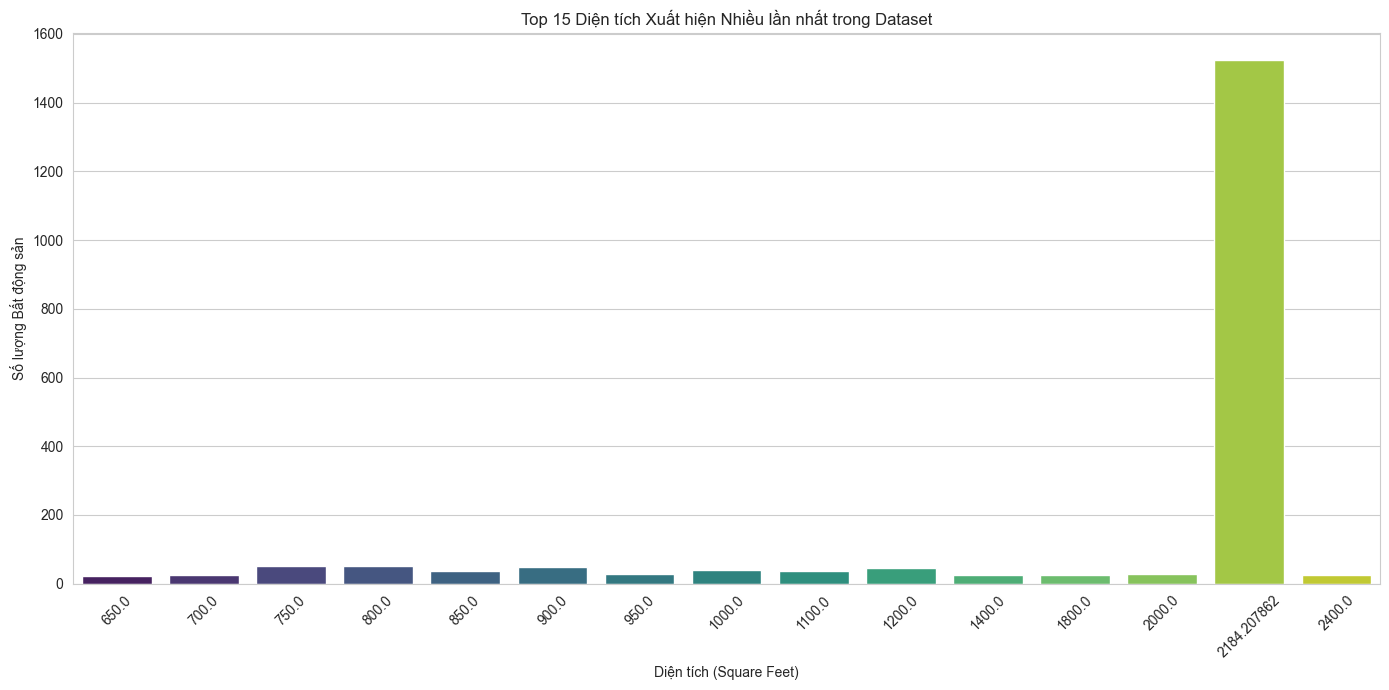

In [41]:
# Ki·ªÉm tra s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã di·ªán t√≠ch tr√πng l·∫∑p
area_frequency = df['PROPERTYSQFT'].value_counts().reset_index()
area_frequency.columns = ['PROPERTYSQFT', 'COUNT']

# L·ªçc ra nh·ªØng di·ªán t√≠ch xu·∫•t hi·ªán nhi·ªÅu l·∫ßn (v√≠ d·ª•: t·ª´ 5 l·∫ßn tr·ªü l√™n)
common_areas = area_frequency[area_frequency['COUNT'] >= 5].sort_values('COUNT', ascending=False)

print(f"C√≥ {len(common_areas)} gi√° tr·ªã di·ªán t√≠ch xu·∫•t hi·ªán t·ª´ 5 l·∫ßn tr·ªü l√™n.")
print("Top 10 di·ªán t√≠ch ph·ªï bi·∫øn nh·∫•t:")
display(common_areas.head(10))

# V·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ tr·ª±c quan h√≥a
plt.figure(figsize=(14, 7))
sns.barplot(data=common_areas.head(15), x='PROPERTYSQFT', y='COUNT', palette="viridis")
plt.title('Top 15 Di·ªán t√≠ch Xu·∫•t hi·ªán Nhi·ªÅu l·∫ßn nh·∫•t trong Dataset')
plt.xlabel('Di·ªán t√≠ch (Square Feet)')
plt.ylabel('S·ªë l∆∞·ª£ng B·∫•t ƒë·ªông s·∫£n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Ch·ªçn m·ªôt di·ªán t√≠ch ph·ªï bi·∫øn ƒë·ªÉ ph√¢n t√≠ch s√¢u (v√≠ d·ª•: 1000 sqft)
target_area = 2184.207862
cluster_df = df[df['PROPERTYSQFT'] == target_area].copy()

print(f"Ph√¢n t√≠ch s√¢u cho c√°c b·∫•t ƒë·ªông s·∫£n c√≥ di·ªán t√≠ch ch√≠nh x√°c {target_area} sqft")
print(f"T·ªïng s·ªë l∆∞·ª£ng: {len(cluster_df)}")
print("\n--- Ph√¢n b·ªë theo LO·∫†I H√åNH (PROPERTY_TYPE) ---")
print(cluster_df['PROPERTY_TYPE'].value_counts())
print("\n--- Ph√¢n b·ªë theo QU·∫¨N ---")
print(cluster_df['BOROUGH'].value_counts())
print("\n--- Ph√¢n b·ªë theo BROKER ---")
display(cluster_df['BROKERTITLE'].value_counts().head())

# Ph√¢n t√≠ch gi√° cho c·ª•m n√†y
print(f"\n--- Th·ªëng k√™ GI√Å cho c·ª•m {target_area} sqft ---")
print(f"Gi√° trung b√¨nh: ${cluster_df['PRICE'].mean():,.0f}")
print(f"Gi√° trung v·ªã: ${cluster_df['PRICE'].median():,.0f}")
print(f"Kho·∫£ng gi√°: ${cluster_df['PRICE'].min():,.0f} - ${cluster_df['PRICE'].max():,.0f}")

Ph√¢n t√≠ch s√¢u cho c√°c b·∫•t ƒë·ªông s·∫£n c√≥ di·ªán t√≠ch ch√≠nh x√°c 2184.207862 sqft
T·ªïng s·ªë l∆∞·ª£ng: 1525

--- Ph√¢n b·ªë theo LO·∫†I H√åNH (PROPERTY_TYPE) ---
PROPERTY_TYPE
co op                713
house                254
multi family home    240
condo                113
other                101
townhouse             60
land                  43
mobile home            1
Name: count, dtype: int64

--- Ph√¢n b·ªë theo QU·∫¨N ---
BOROUGH
Manhattan        1140
Queens            269
Brooklyn           79
Bronx              34
Staten Island       3
Name: count, dtype: int64

--- Ph√¢n b·ªë theo BROKER ---


BROKERTITLE
compass                 163
corcoran                149
douglas elliman         104
keller williams          87
brown harris stevens     79
Name: count, dtype: int64


--- Th·ªëng k√™ GI√Å cho c·ª•m 2184.207862 sqft ---
Gi√° trung b√¨nh: $1,602,810
Gi√° trung v·ªã: $750,000
Kho·∫£ng gi√°: $99,000 - $60,000,000


Ph·∫ßn l·ªõn d·ªØ li·ªáu c·ªßa b·∫°n l√† c√°c b·∫•t ƒë·ªông s·∫£n l·ªõn, hi·∫øm c√≥ ·ªü NYC. Ch√∫ng ch·ªß y·∫øu l√† Co-op ·ªü Manhattan, v·ªõi m·ª©c gi√° th·ª±c t·∫ø ph·ªï bi·∫øn nh·∫•t l√† kho·∫£ng $750,000. Tuy nhi√™n, do l·∫´n v√†o nh·ªØng b·∫•t ƒë·ªông s·∫£n si√™u sang c√≥ gi√° c·∫£ h√†ng ch·ª•c tri·ªáu ƒë√¥, n√™n gi√° trung b√¨nh b·ªã ƒë·∫©y l√™n t·∫≠n $1.6 tri·ªáu v√† kh√¥ng ph·∫£n √°nh ƒë√∫ng gi√° tr·ªã "ƒëi·ªÉn h√¨nh".



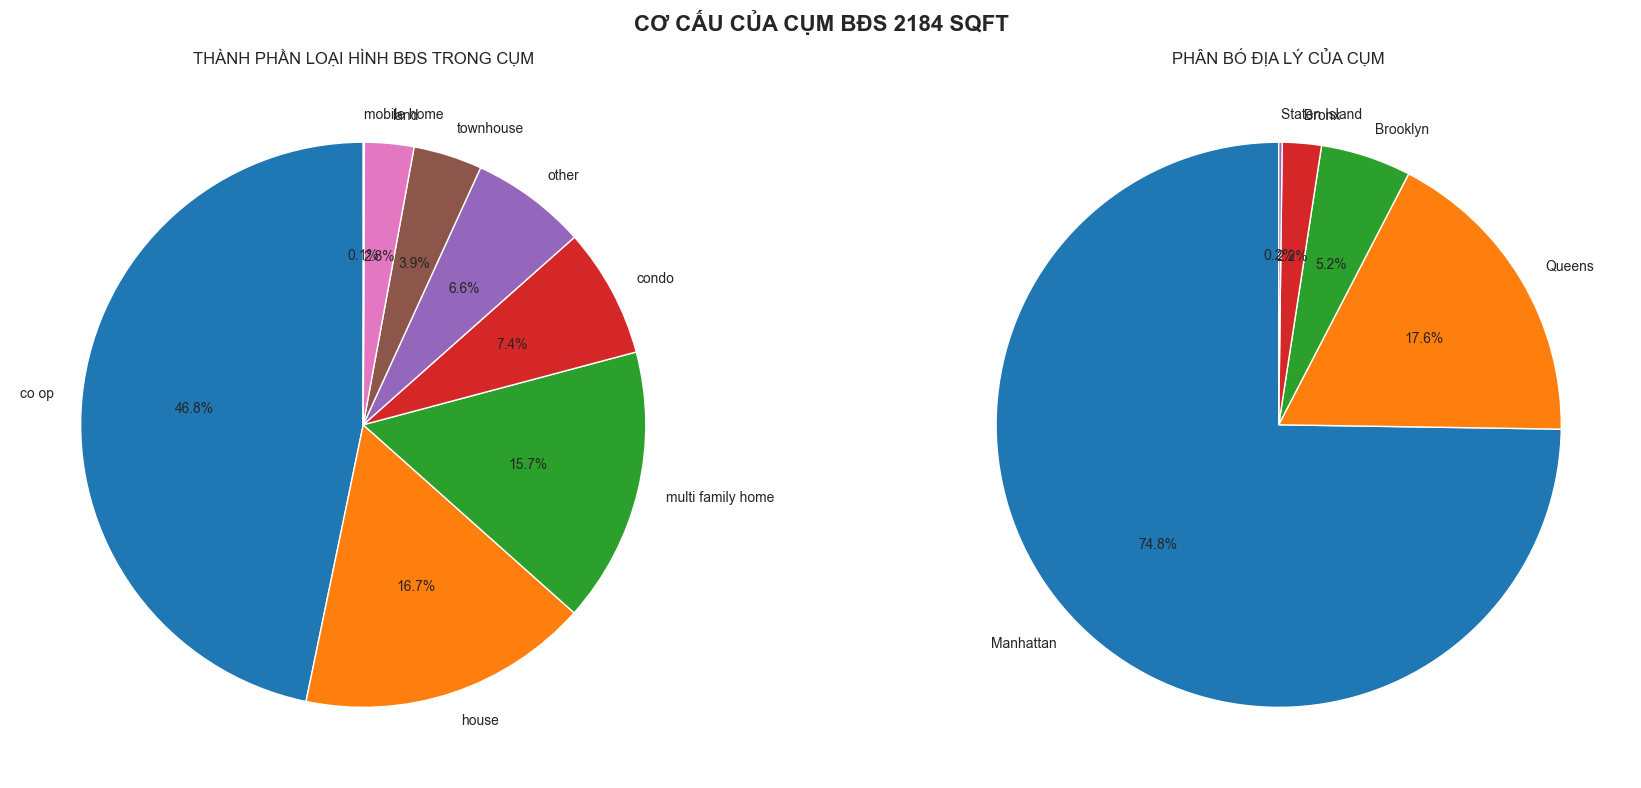

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart cho lo·∫°i h√¨nh
prop_type_counts = cluster_df['PROPERTY_TYPE'].value_counts()
ax[0].pie(prop_type_counts.values, labels=prop_type_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('TH√ÄNH PH·∫¶N LO·∫†I H√åNH BƒêS TRONG C·ª§M')

# Pie chart cho ph√¢n b·ªë ƒë·ªãa l√Ω
borough_counts = cluster_df['BOROUGH'].value_counts()
ax[1].pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('PH√ÇN B·ªê ƒê·ªäA L√ù C·ª¶A C·ª§M')

plt.suptitle('C∆† C·∫§U C·ª¶A C·ª§M BƒêS 2184 SQFT', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Manhattan th·ªëng tr·ªã ph√¢n kh√∫c l·ªõn: 75% (1140/1525) b·∫•t ƒë·ªông s·∫£n trong nh√≥m di·ªán t√≠ch "l·ªói" n√†y ƒë·∫øn t·ª´ Manhattan. ƒêi·ªÅu n√†y, d√π l√† l·ªói, nh∆∞ng c≈©ng gi√°n ti·∫øp cho th·∫•y Manhattan c√≥ nhi·ªÅu b·∫•t ƒë·ªông s·∫£n c√≥ di·ªán t√≠ch l·ªõn (nh·ªØng cƒÉn penthouse, duplex, ho·∫∑c townhouse ƒë∆∞·ª£c chia nh·ªè) h∆°n c√°c qu·∫≠n kh√°c.

Co-op chi·∫øm ∆∞u th·∫ø: Trong nh√≥m n√†y ·ªü Manhattan, Co-op l√† lo·∫°i h√¨nh ph·ªï bi·∫øn nh·∫•t (713 b·∫£n ghi). ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi th·ª±c t·∫ø l√† c√°c t√≤a nh√† Co-op th∆∞·ªùng l√† nh·ªØng t√≤a nh√† c≈©, c·ªï ƒëi·ªÉn c√≥ c√°c cƒÉn h·ªô v·ªõi m·∫∑t b·∫±ng s√†n r·ªông.



In [44]:
weird_sqft_data = df[df['PROPERTYSQFT'] == 2184.207862]

# Hi·ªÉn th·ªã to√†n b·ªô d·ªØ li·ªáu c·ªßa c√°c h√†ng n√†y
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
print(weird_sqft_data)
pd.reset_option('display.max_rows')  

                                            BROKERTITLE     PRICE  BEDS  BATH  \
3                             nest seekers  long island    325000     1     1   
4                                              du chris    230000     1     1   
7                                               e  corp    275000     1     1   
9                                  brown harris stevens    199900     1     1   
10                                 brown harris stevens    849000     1     1   
13                               monticello real estate    198000     1     1   
20                                             corcoran    550000     1     1   
22                                              compass   2250000     1     1   
23                                            sotheby's    269000     1     1   
24                                              compass    399000     1     1   
29                                   prime  long island    299000     1     1   
35                          

## üîë K·∫øt lu·∫≠n t·ªïng th·ªÉ

1. **Gi√° tr·ªã Luxury kh√¥ng n·∫±m ·ªü di·ªán t√≠ch**  
   - D√π Luxury c√≥ di·ªán t√≠ch l·ªõn h∆°n, nh∆∞ng ph·∫ßn ch√™nh l·ªách gi√° ch·ªß y·∫øu ƒë·∫øn t·ª´ **v·ªã tr√≠ ƒë·∫Øc ƒë·ªãa, t·∫ßm view, ti·ªán √≠ch, th∆∞∆°ng hi·ªáu v√† tr·∫£i nghi·ªám s·ªëng**.  
   - Ng∆∞·ªùi mua Luxury tr·∫£ ti·ªÅn cho **l·ªëi s·ªëng** h∆°n l√† cho ‚Äúft¬≤ s√†n‚Äù.

2. **Ph√≤ng t·∫Øm quan tr·ªçng h∆°n ph√≤ng ng·ªß**  
   - Luxury c√≥ s·ªë ph√≤ng t·∫Øm nhi·ªÅu h∆°n r√µ r·ªát, trong khi s·ªë ph√≤ng ng·ªß kh√¥ng tƒÉng nhi·ªÅu.  
   - ƒêi·ªÅu n√†y cho th·∫•y gi·ªõi th∆∞·ª£ng l∆∞u ∆∞u ti√™n **ti·ªán nghi c√° nh√¢n, s·ª± ri√™ng t∆∞** h∆°n kh·∫£ nƒÉng ch·ª©a nhi·ªÅu ng∆∞·ªùi.

3. **Lo·∫°i h√¨nh b·∫•t ƒë·ªông s·∫£n kh√°c bi·ªát**  
   - **Standard** ph·ªï bi·∫øn v·ªõi **Co-op v√† House** ‚Üí l·ª±a ch·ªçn truy·ªÅn th·ªëng, ƒë·∫°i ch√∫ng.  
   - **Luxury** thi√™n v·ªÅ **Condo cao c·∫•p v√† Townhouse** ‚Üí ph√π h·ª£p phong c√°ch s·ªëng hi·ªán ƒë·∫°i, sang tr·ªçng.

4. **Ph√¢n b·ªë ƒë·ªãa l√Ω r√µ r√†ng**  
   - **Manhattan** l√† ‚Äúth·ªß ph·ªß‚Äù c·ªßa Luxury, chi·∫øm g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi.  
   - **Brooklyn** n·ªïi l√™n nh∆∞ th·ªã tr∆∞·ªùng ti·ªÅm nƒÉng, thu h√∫t ng∆∞·ªùi c√≥ thu nh·∫≠p cao nh∆∞ng ch∆∞a ch·∫°m ƒë·∫øn Manhattan.  
   - C√°c qu·∫≠n c√≤n l·∫°i (Queens, Bronx, Staten Island) ch·ªß y·∫øu v·∫´n thu·ªôc th·ªã tr∆∞·ªùng Standard.

5. **Gi√° tr√™n m·ªói ft¬≤ l√† th∆∞·ªõc ƒëo ƒë·∫≥ng c·∫•p**  
   - Gi√°/ft¬≤ Luxury cao g·∫•p nhi·ªÅu l·∫ßn Standard, kh·∫≥ng ƒë·ªãnh gi√° tr·ªã **kh√¥ng t·ª∑ l·ªá thu·∫≠n v·ªõi di·ªán t√≠ch**.  
   - M·ªói khu v·ª±c c√≥ ‚Äúpremium‚Äù ri√™ng, ph·∫£n √°nh s·ª©c h√∫t v√† m·ª©c s·∫µn s√†ng chi tr·∫£ c·ªßa th·ªã tr∆∞·ªùng.


## ·ª®ng D·ª•ng Th·ª±c T·∫ø T·ª´ Insight B·∫•t ƒê·ªông S·∫£n

### 1. ƒê·ªëi v·ªõi Nh√† ƒê·∫ßu t∆∞ & Ng∆∞·ªùi Mua Nh√†
- **ƒê·ªãnh h∆∞·ªõng ƒë·∫ßu t∆∞:**
  - **An to√†n, thanh kho·∫£n cao** ‚Üí ch·ªçn **Nornal** (Co-op, House) ·ªü **Brooklyn, Queens**. Th·ªã tr∆∞·ªùng ƒë·∫°i ch√∫ng, √≠t bi·∫øn ƒë·ªông, d·ªÖ mua b√°n.  
  - **L·ª£i nhu·∫≠n cao, ch·∫•p nh·∫≠n r·ªßi ro** ‚Üí nh·∫Øm **Condo cao c·∫•p** ·ªü **Manhattan**. Gi√° bi·∫øn ƒë·ªông l·ªõn, ti·ªÅm nƒÉng tƒÉng nh·ªù v·ªã tr√≠ + th∆∞∆°ng hi·ªáu.  

- **Quy·∫øt ƒë·ªãnh mua th√¥ng minh:**
  - **ƒê·ª´ng ch·ªâ nh√¨n di·ªán t√≠ch:** 100m¬≤ ·ªü Manhattan ƒë·∫Øt g·∫•p 3‚Äì4 l·∫ßn Queens ‚Üí ng√¢n s√°ch **∆∞u ti√™n v·ªã tr√≠ h∆°n di·ªán t√≠ch**.  
  - **∆Øu ti√™n ph√≤ng t·∫Øm:** Nh√† 3 ph√≤ng ng·ªß + 3 ph√≤ng t·∫Øm c√≥ gi√° tr·ªã h∆°n 4 ph√≤ng ng·ªß + 2 ph√≤ng t·∫Øm ‚Üí d·ªÖ cho thu√™/b√°n.  

---

### 2. ƒê·ªëi v·ªõi Nh√† M√¥i gi·ªõi & Ch·ªß ƒê·∫ßu t∆∞
- **Chi·∫øn l∆∞·ª£c marketing:**
  - **Luxury** ‚Üí nh·∫•n m·∫°nh **view, ti·ªán √≠ch (pool, gym, b·∫£o v·ªá 24/7), ƒë·ªãa ch·ªâ ƒë·∫Øc ƒë·ªãa** ‚Üí b√°n ‚Äúl·ªëi s·ªëng‚Äù.  
  - **Normal** ‚Üí t·∫≠p trung v√†o **gi√° tr·ªã th·ª±c, c√¥ng nƒÉng, ti·∫øt ki·ªám chi ph√≠**.  




## 2.2. Multivariate Analysis

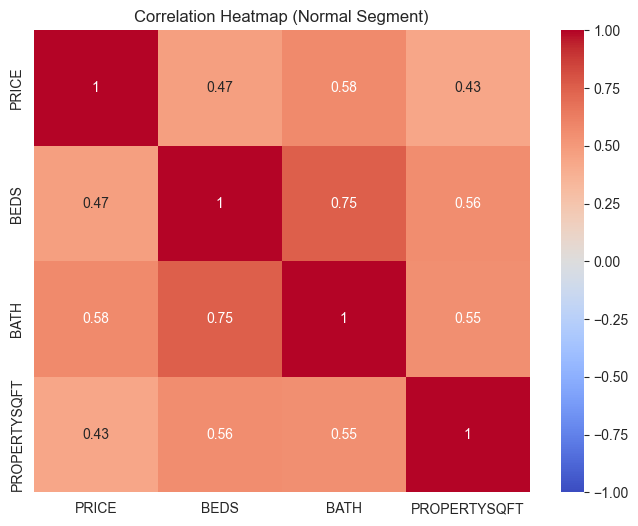

In [45]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr_matrix = df_numeric.corr()

# V·∫Ω heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\2020753829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)


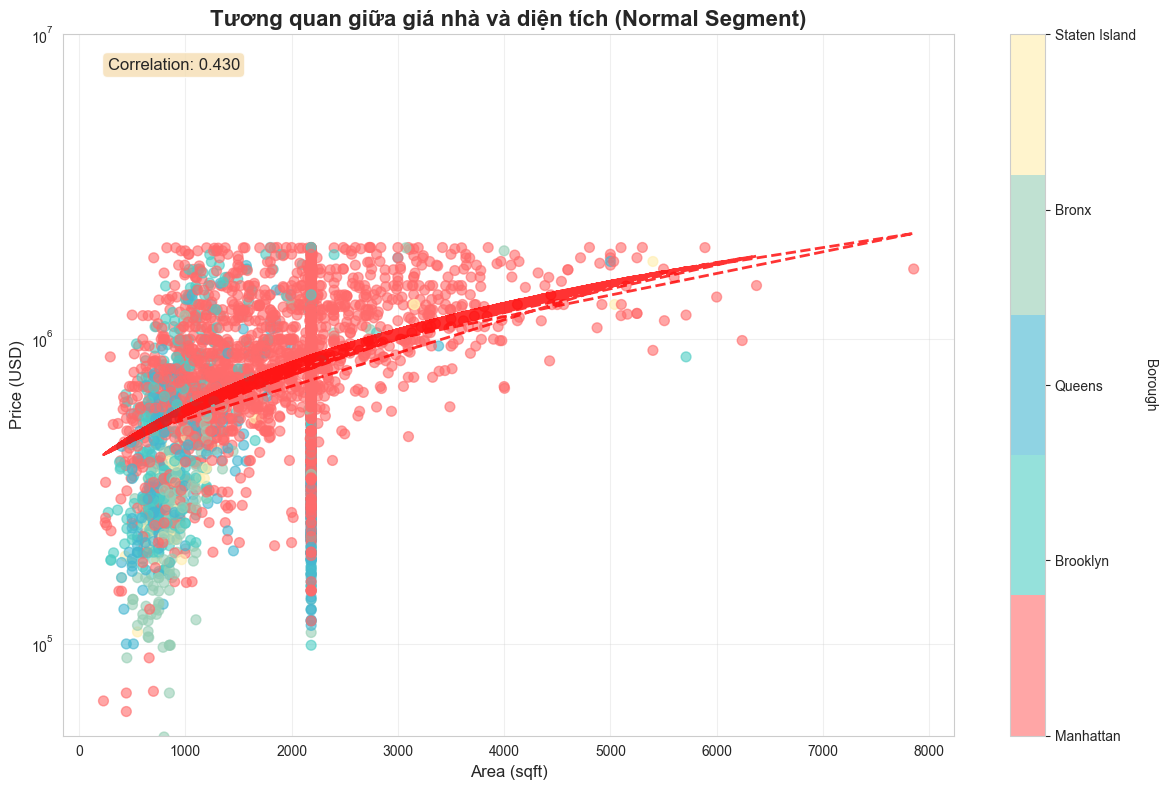

In [46]:
import matplotlib.colors  
borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # M√†u c·ªë ƒë·ªãnh

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Th√™m h·ªá s·ªë t∆∞∆°ng quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Th√™m colorbar v·ªõi nh√£n r·ªùi r·∫°c
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('T∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

In [47]:
import statsmodels.api as sm

X_lux = sm.add_constant(df_luxury['PROPERTYSQFT'])
y_lux = df_luxury['PRICE']
model_lux = sm.OLS(y_lux, X_lux).fit()

print("=== Luxury ===")
print(model_lux.summary())

coef_sqft_lux = model_lux.params['PROPERTYSQFT']
print(f"Luxury: M·ªói 1 sqft tƒÉng, gi√° tƒÉng kho·∫£ng ${coef_sqft_lux:,.2f}\n")


=== Luxury ===
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     80.17
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.29e-18
Time:                        09:02:10   Log-Likelihood:                -14310.
No. Observations:                 817   AIC:                         2.862e+04
Df Residuals:                     815   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.42e+06   4.55e+0

In [48]:

X_std = sm.add_constant(df_normal['PROPERTYSQFT'])
y_std = df_normal['PRICE']
model_std = sm.OLS(y_std, X_std).fit()

print("=== Standard ===")
print(model_std.summary())

coef_sqft_std = model_std.params['PROPERTYSQFT']
print(f"Standard: M·ªói 1 sqft tƒÉng, gi√° tƒÉng kho·∫£ng ${coef_sqft_std:,.2f}")


=== Standard ===
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     844.1
Date:                Wed, 17 Sep 2025   Prob (F-statistic):          1.87e-167
Time:                        09:02:10   Log-Likelihood:                -53386.
No. Observations:                3726   AIC:                         1.068e+05
Df Residuals:                    3724   BIC:                         1.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.634e+05   1.58e

## Ph√¢n t√≠ch H·ªìi quy: ·∫¢nh h∆∞·ªüng c·ªßa Di·ªán t√≠ch ƒë·∫øn Gi√° Nh√†

### 1. Luxury Segment
- **Intercept (const) ‚âà $3,139,000** ‚Üí m·ª©c gi√° c∆° b·∫£n ngay c·∫£ khi di·ªán t√≠ch = 0.  
- **H·ªá s·ªë PROPERTYSQFT ‚âà $774.34** ‚Üí m·ªói 1 sqft tƒÉng, gi√° tƒÉng trung b√¨nh **$774**.  
- **R¬≤ = 0.127** ‚Üí di·ªán t√≠ch ch·ªâ gi·∫£i th√≠ch ~12.7% bi·∫øn ƒë·ªông gi√°.  
  ‚Üí Ngo√†i di·ªán t√≠ch, **v·ªã tr√≠, ti·ªán nghi, view, th∆∞∆°ng hi·ªáu** quy·∫øt ƒë·ªãnh ph·∫ßn l·ªõn gi√° Luxury.  

### 2. Standard Segment
- **H·ªá s·ªë PROPERTYSQFT ‚âà $242.50** ‚Üí m·ªói 1 sqft tƒÉng, gi√° tƒÉng trung b√¨nh **$243**.  
- **R¬≤ cao h∆°n Luxury** ‚Üí gi√° Standard ph·ª• thu·ªôc di·ªán t√≠ch nhi·ªÅu h∆°n, √≠t ch·ªãu ·∫£nh h∆∞·ªüng c·ªßa y·∫øu t·ªë ‚Äúpremium‚Äù.  

### 3. So s√°nh & Insight
- **Luxury: $774/sqft vs Standard: $243/sqft** ‚Üí Luxury tr·∫£ g·∫•p ~3 l·∫ßn cho di·ªán t√≠ch.  
- **Standard**: quan h·ªá di·ªán t√≠ch‚Äìgi√° **ƒë∆°n gi·∫£n, d·ªÖ d·ª± b√°o**.  
- **Luxury**: di·ªán t√≠ch ch·ªâ l√† 1 ph·∫ßn, gi√° c√≤n ch·ªãu t√°c ƒë·ªông m·∫°nh t·ª´ **v·ªã tr√≠ & ti·ªán √≠ch cao c·∫•p**.  

üí° **K·∫øt lu·∫≠n:** Ng∆∞·ªùi mua **Luxury** tr·∫£ nhi·ªÅu h∆°n cho di·ªán t√≠ch, nh∆∞ng th·ª±c ch·∫•t h·ªç ƒëang tr·∫£ cho **lifestyle & gi√° tr·ªã v√¥ h√¨nh**. Trong khi ƒë√≥, ng∆∞·ªùi mua **Standard** t·∫≠p trung v√†o **di·ªán t√≠ch & c√¥ng nƒÉng s·ª≠ d·ª•ng**.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\889349862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])


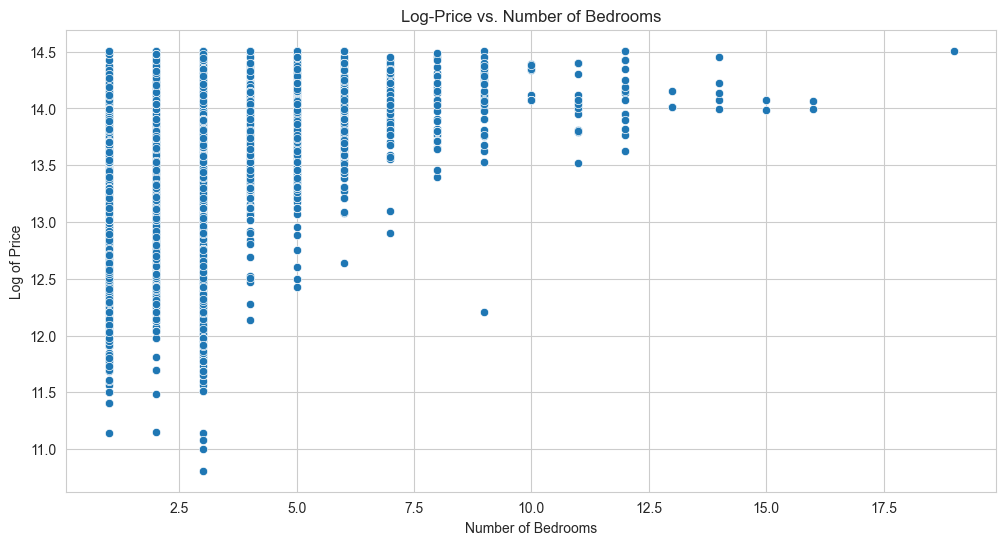

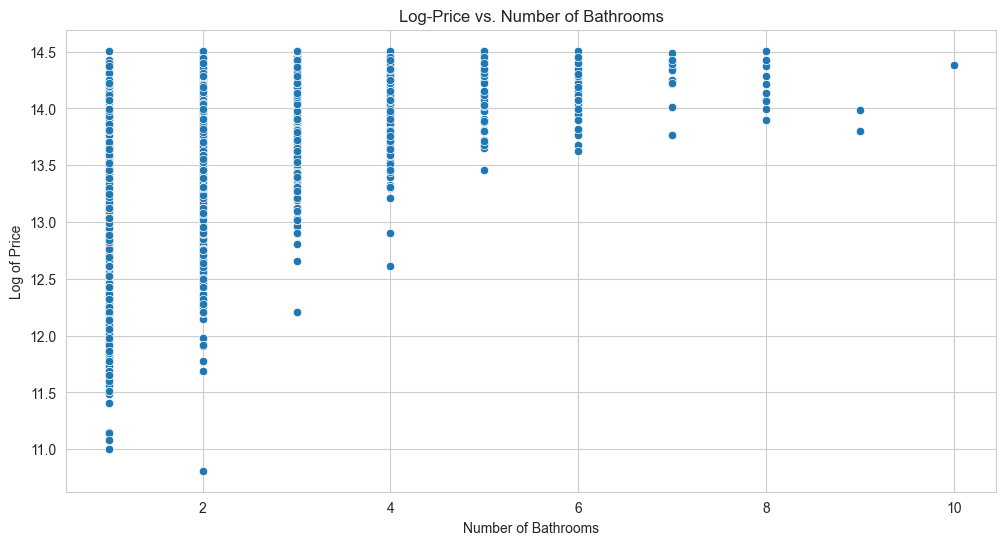

0.4616864977334096 0.5621068162897684


In [49]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [50]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




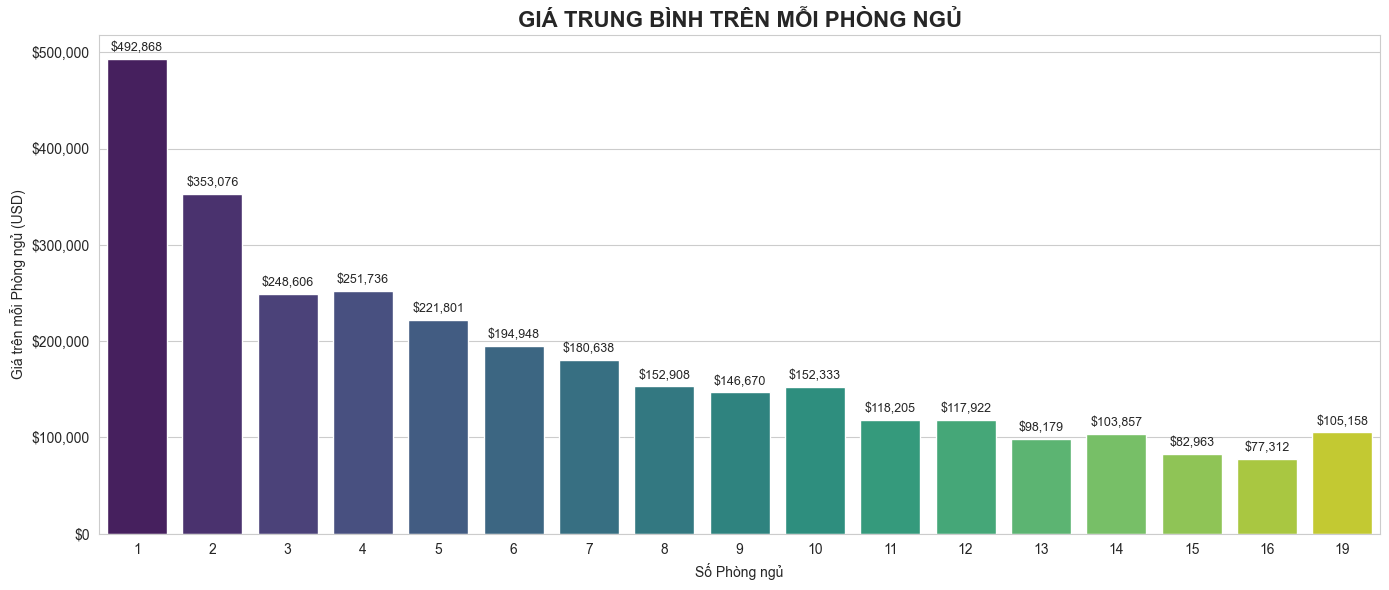

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:45: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




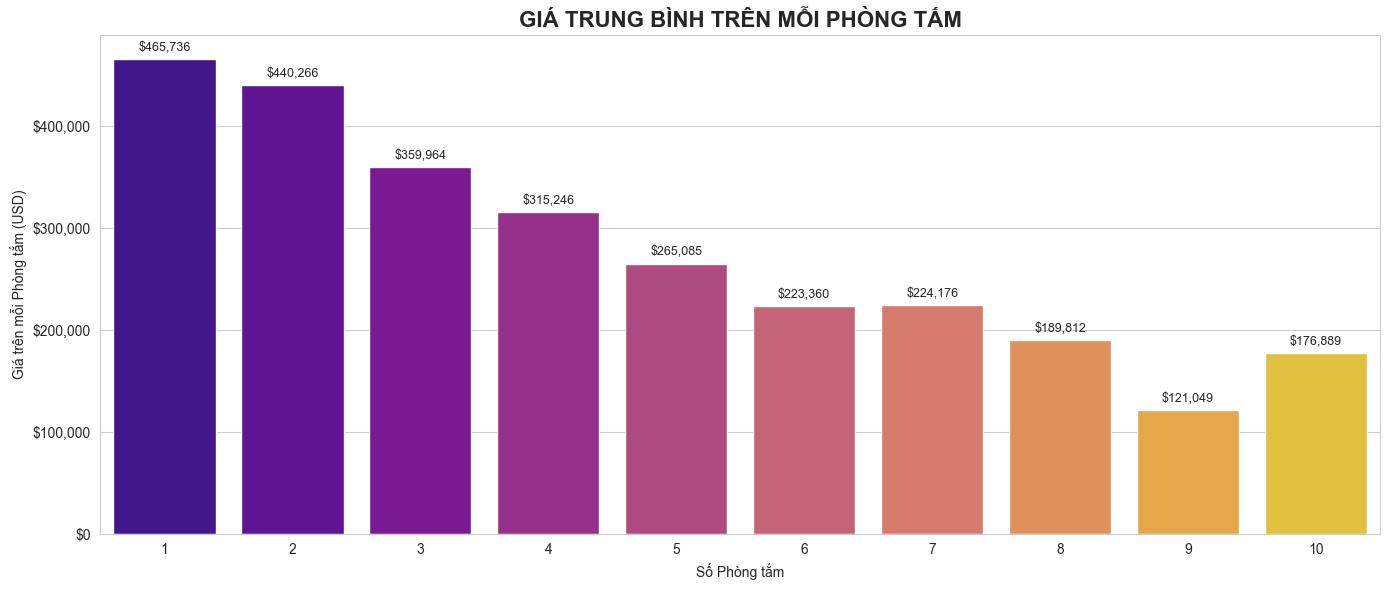

B·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶:


BEDS  PRICE_PER_BED
0      1     492,867.85
1      2     353,075.76
2      3     248,605.82
3      4     251,736.35
4      5     221,801.25
5      6     194,947.71
6      7     180,638.29
7      8     152,907.65
8      9     146,670.36
9     10     152,333.30
10    11     118,205.38
11    12     117,921.86
12    13      98,179.49
13    14     103,857.14
14    15      82,962.93
15    16      77,312.50
16    19     105,157.89


B·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM:


BATH  PRICE_PER_BATH
0     1      465,736.19
1     2      440,265.78
2     3      359,964.10
3     4      315,245.85
4     5      265,085.32
5     6      223,359.58
6     7      224,175.82
7     8      189,812.50
8     9      121,049.33
9    10      176,888.80

In [51]:

df_analysis = df_normal.copy()

# --- T√≠nh to√°n gi√° TR√äN M·ªñI PH√íNG ---
# L·ªçc b·ªè c√°c d√≤ng c√≥ s·ªë ph√≤ng b·∫±ng 0 ƒë·ªÉ tr√°nh l·ªói chia cho 0
df_analysis = df_analysis[df_analysis['BEDS'] > 0]
df_analysis = df_analysis[df_analysis['BATH'] > 0]

# T·∫°o c·ªôt m·ªõi: Gi√° tr√™n m·ªói ph√≤ng ng·ªß v√† m·ªói ph√≤ng t·∫Øm
df_analysis['PRICE_PER_BED'] = df_analysis['PRICE'] / df_analysis['BEDS']
df_analysis['PRICE_PER_BATH'] = df_analysis['PRICE'] / df_analysis['BATH']

# --- Bar plot: Gi√° TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶ ---
plt.figure(figsize=(14, 6))

# Nh√≥m d·ªØ li·ªáu theo s·ªë ph√≤ng ng·ªß v√† t√≠nh gi√° trung b√¨nh TR√äN M·ªñI PH√íNG
price_per_bed = df_analysis.groupby('BEDS')['PRICE_PER_BED'].mean().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì
ax = sns.barplot(x='BEDS', y='PRICE_PER_BED', data=price_per_bed, palette='viridis', ci=None)
plt.title("GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶", fontsize=16, fontweight='bold')
plt.xlabel("S·ªë Ph√≤ng ng·ªß")
plt.ylabel("Gi√° tr√™n m·ªói Ph√≤ng ng·ªß (USD)")

# ƒê·ªãnh d·∫°ng tr·ª•c Y th√†nh ti·ªÅn t·ªá
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Th√™m gi√° ti·ªÅn tr√™n c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Bar plot: Gi√° TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM ---
plt.figure(figsize=(14, 6))

# Nh√≥m d·ªØ li·ªáu theo s·ªë ph√≤ng t·∫Øm v√† t√≠nh gi√° trung b√¨nh TR√äN M·ªñI PH√íNG
price_per_bath = df_analysis.groupby('BATH')['PRICE_PER_BATH'].mean().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì
ax = sns.barplot(x='BATH', y='PRICE_PER_BATH', data=price_per_bath, palette='plasma', ci=None)
plt.title("GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM", fontsize=16, fontweight='bold')
plt.xlabel("S·ªë Ph√≤ng t·∫Øm")
plt.ylabel("Gi√° tr√™n m·ªói Ph√≤ng t·∫Øm (USD)")

# ƒê·ªãnh d·∫°ng tr·ª•c Y th√†nh ti·ªÅn t·ªá
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Th√™m gi√° ti·ªÅn tr√™n c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- IN RA B·∫¢NG S·ªê LI·ªÜU ƒê·ªÇ PH√ÇN T√çCH S√ÇU H∆†N ---
print("B·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶:")
display(price_per_bed.round(2))

print("\nB·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM:")
display(price_per_bath.round(2))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




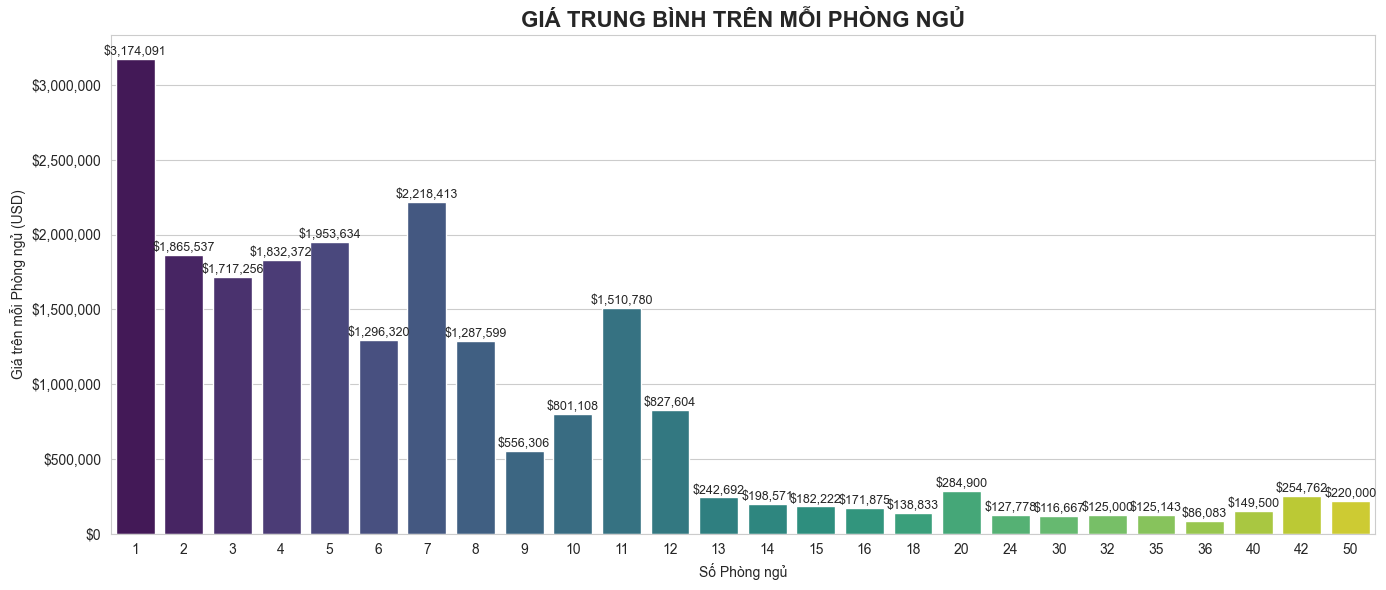

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:45: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




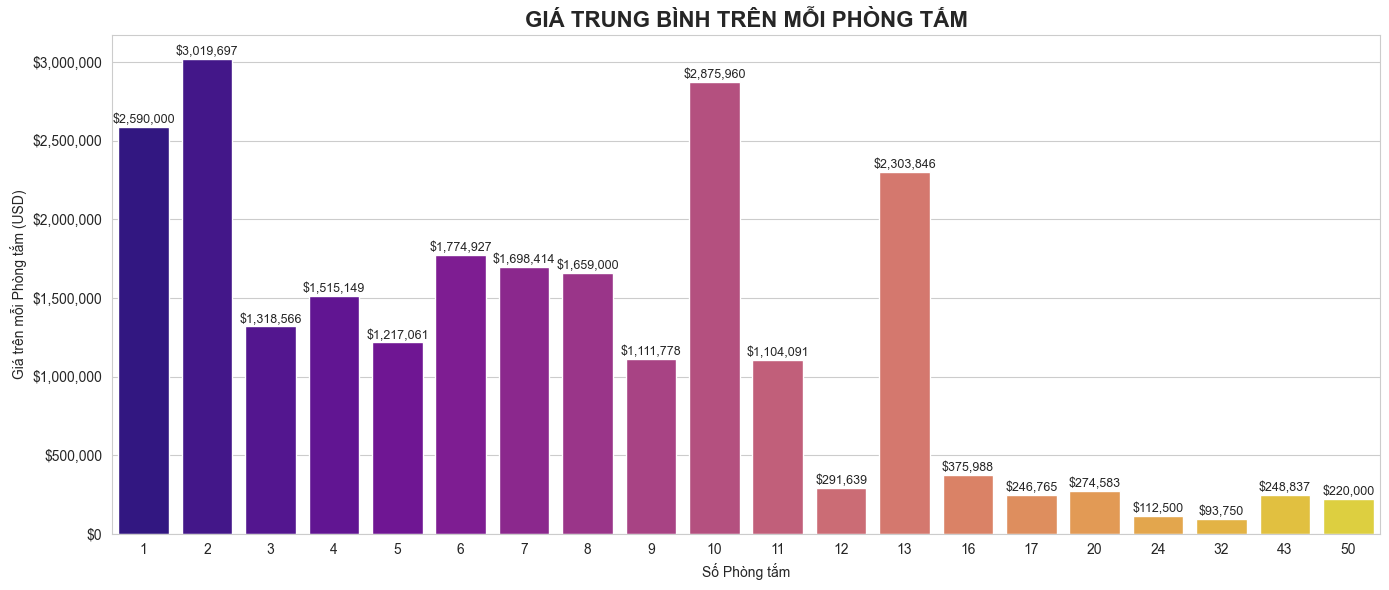

B·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶:


BEDS  PRICE_PER_BED
0      1   3,174,090.91
1      2   1,865,537.37
2      3   1,717,255.58
3      4   1,832,372.21
4      5   1,953,634.47
5      6   1,296,320.07
6      7   2,218,413.11
7      8   1,287,599.36
8      9     556,305.56
9     10     801,107.69
10    11   1,510,779.78
11    12     827,604.17
12    13     242,692.31
13    14     198,571.43
14    15     182,222.20
15    16     171,875.00
16    18     138,833.33
17    20     284,900.00
18    24     127,777.78
19    30     116,666.67
20    32     125,000.00
21    35     125,142.86
22    36      86,083.33
23    40     149,500.00
24    42     254,761.90
25    50     220,000.00


B·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM:


BATH  PRICE_PER_BATH
0      1    2,590,000.00
1      2    3,019,696.69
2      3    1,318,565.97
3      4    1,515,148.92
4      5    1,217,060.82
5      6    1,774,927.37
6      7    1,698,414.29
7      8    1,659,000.00
8      9    1,111,777.76
9     10    2,875,960.00
10    11    1,104,090.91
11    12      291,638.89
12    13    2,303,846.15
13    16      375,987.50
14    17      246,764.71
15    20      274,583.33
16    24      112,500.00
17    32       93,750.00
18    43      248,837.21
19    50      220,000.00

In [52]:

df_analysis = df_luxury.copy()

# --- T√≠nh to√°n gi√° TR√äN M·ªñI PH√íNG ---
# L·ªçc b·ªè c√°c d√≤ng c√≥ s·ªë ph√≤ng b·∫±ng 0 ƒë·ªÉ tr√°nh l·ªói chia cho 0
df_analysis = df_analysis[df_analysis['BEDS'] > 0]
df_analysis = df_analysis[df_analysis['BATH'] > 0]

# T·∫°o c·ªôt m·ªõi: Gi√° tr√™n m·ªói ph√≤ng ng·ªß v√† m·ªói ph√≤ng t·∫Øm
df_analysis['PRICE_PER_BED'] = df_analysis['PRICE'] / df_analysis['BEDS']
df_analysis['PRICE_PER_BATH'] = df_analysis['PRICE'] / df_analysis['BATH']

# --- Bar plot: Gi√° TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶ ---
plt.figure(figsize=(14, 6))

# Nh√≥m d·ªØ li·ªáu theo s·ªë ph√≤ng ng·ªß v√† t√≠nh gi√° trung b√¨nh TR√äN M·ªñI PH√íNG
price_per_bed = df_analysis.groupby('BEDS')['PRICE_PER_BED'].mean().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì
ax = sns.barplot(x='BEDS', y='PRICE_PER_BED', data=price_per_bed, palette='viridis', ci=None)
plt.title("GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶", fontsize=16, fontweight='bold')
plt.xlabel("S·ªë Ph√≤ng ng·ªß")
plt.ylabel("Gi√° tr√™n m·ªói Ph√≤ng ng·ªß (USD)")

# ƒê·ªãnh d·∫°ng tr·ª•c Y th√†nh ti·ªÅn t·ªá
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Th√™m gi√° ti·ªÅn tr√™n c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Bar plot: Gi√° TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM ---
plt.figure(figsize=(14, 6))

# Nh√≥m d·ªØ li·ªáu theo s·ªë ph√≤ng t·∫Øm v√† t√≠nh gi√° trung b√¨nh TR√äN M·ªñI PH√íNG
price_per_bath = df_analysis.groupby('BATH')['PRICE_PER_BATH'].mean().reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì
ax = sns.barplot(x='BATH', y='PRICE_PER_BATH', data=price_per_bath, palette='plasma', ci=None)
plt.title("GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM", fontsize=16, fontweight='bold')
plt.xlabel("S·ªë Ph√≤ng t·∫Øm")
plt.ylabel("Gi√° tr√™n m·ªói Ph√≤ng t·∫Øm (USD)")

# ƒê·ªãnh d·∫°ng tr·ª•c Y th√†nh ti·ªÅn t·ªá
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Th√™m gi√° ti·ªÅn tr√™n c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- IN RA B·∫¢NG S·ªê LI·ªÜU ƒê·ªÇ PH√ÇN T√çCH S√ÇU H∆†N ---
print("B·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG NG·ª¶:")
display(price_per_bed.round(2))

print("\nB·∫¢NG GI√Å TRUNG B√åNH TR√äN M·ªñI PH√íNG T·∫ÆM:")
display(price_per_bath.round(2))

In [53]:
# T√≠nh gi√° trung b√¨nh theo s·ªë ph√≤ng ng·ªß v√† ph√≤ng t·∫Øm
avg_price_by_beds = df.groupby('BEDS')['PRICE'].mean()
avg_price_by_bath = df.groupby('BATH')['PRICE'].mean()

# In ra k·∫øt qu·∫£ gi·ªëng v√≠ d·ª• tr∆∞·ªõc
print("Average Price by Number of Bedrooms:")
print(avg_price_by_beds.round(2))

print("\nAverage Price by Number of Bathrooms:")
display(avg_price_by_bath.round(2))


Average Price by Number of Bedrooms:
BEDS
1       530,973.09
2     1,049,018.88
3     1,451,407.88
4     2,710,976.63
5     4,072,708.92
6     3,423,657.62
7     6,852,592.79
8     5,593,925.57
9     2,096,184.16
10    5,539,555.43
11    5,129,838.80
12    3,118,299.85
13    2,027,800.00
14    1,675,000.00
15    2,137,777.40
16    1,993,500.00
18    2,499,000.00
19    1,998,000.00
20    5,698,000.00
24    3,066,666.67
30    3,500,000.00
32    4,000,000.00
35    4,380,000.00
36    3,099,000.00
40    5,980,000.00
42   10,700,000.00
50   11,000,000.00
Name: PRICE, dtype: float64

Average Price by Number of Bathrooms:


BATH
1       473,096.77
2     1,700,757.45
3     1,707,340.79
4     3,488,254.47
5     3,249,632.40
6     7,593,804.76
7     6,056,043.48
8     9,991,953.49
9     7,458,412.43
10   27,072,680.50
11   12,145,000.00
12    3,499,666.67
13   29,950,000.00
16    6,015,800.00
17    4,195,000.00
20    5,491,666.67
24    2,700,000.00
32    3,000,000.00
43   10,700,000.00
50   11,000,000.00
Name: PRICE, dtype: float64

## üìä Insight v·ªÅ ·∫¢nh h∆∞·ªüng c·ªßa BEDS & BATH ƒë·∫øn Gi√° Nh√†

---

### üîπ Insight 1: Ph√≤ng t·∫Øm (BATH) quan tr·ªçng h∆°n Ph√≤ng ng·ªß (BEDS)
- **1 ‚Üí 2 ph√≤ng t·∫Øm**: gi√° tƒÉng t·ª´ **$473K ‚Üí $1.7M** (~+260%).  
- **1 ‚Üí 2 ph√≤ng ng·ªß**: gi√° tƒÉng t·ª´ **$530K ‚Üí $1.05M** (~+100%).  

üëâ Th·ªã tr∆∞·ªùng tr·∫£ premium l·ªõn h∆°n cho **ti·ªán nghi & ri√™ng t∆∞** ‚Üí ph√≤ng t·∫Øm l√† y·∫øu t·ªë ƒë·ªãnh gi√° m·∫°nh.

---

### üîπ Insight 2: Quy lu·∫≠t ‚ÄúL·ª£i t·ª©c gi·∫£m d·∫ßn‚Äù (Diminishing Returns)
- **BEDS**: tƒÉng ƒë·∫øn 4 ph√≤ng ng·ªß th√¨ h·ª£p l√Ω, sau ƒë√≥ bi·∫øn ƒë·ªông th·∫•t th∆∞·ªùng ‚Üí nhu c·∫ßu >4 ph√≤ng ng·ªß th·∫•p, kh√¥ng ·ªïn ƒë·ªãnh.  
- **BATH**: gi√° v·∫´n tƒÉng ƒë·ªÅu t·ªõi 10 ph√≤ng t·∫Øm (~$27M) ‚Üí v·ªõi ph√¢n kh√∫c si√™u sang, ph√≤ng t·∫Øm v·∫´n t·∫°o gi√° tr·ªã.

---

### üîπ Insight 3: Ba ph√¢n kh√∫c th·ªã tr∆∞·ªùng r√µ r√†ng
1. **Ph·ªï th√¥ng**: 1‚Äì2 BEDS, 1‚Äì2 BATH ‚Üí < $1.7M.  
2. **Trung & Cao c·∫•p**: 3‚Äì4 BEDS, 3‚Äì4 BATH ‚Üí $1.4M ‚Äì $3.5M.  
3. **Si√™u sang**: 5+ BEDS, 5+ BATH ‚Üí $3.2M ‚Äì $30M.  
   - Bi·∫øn ƒë·ªông r·∫•t cao, gi√° ph·ª• thu·ªôc v√†o **v·ªã tr√≠, view, th∆∞∆°ng hi·ªáu** h∆°n l√† s·ªë ph√≤ng.

---

### üîπ Insight 4: ‚Äúƒêu√¥i d√†i‚Äù ƒë·∫∑c th√π c·ªßa NYC
- T·ªìn t·∫°i nh√† c√≥ **10, 20, th·∫≠m ch√≠ 50 ph√≤ng t·∫Øm**.  
- ƒê√¢y l√† d·∫•u hi·ªáu c·ªßa **th·ªã tr∆∞·ªùng si√™u cao c·∫•p** (penthouse, dinh th·ª±, kh√°ch s·∫°n c·∫£i t·∫°o).

---

### üí° ·ª®ng d·ª•ng & Khuy·∫øn ngh·ªã
- **Ng∆∞·ªùi b√°n / Nh√† ph√°t tri·ªÉn**:  
  - ƒê·∫ßu t∆∞ v√†o **ph√≤ng t·∫Øm** h∆°n l√† th√™m ph√≤ng ng·ªß.  
  - C·∫£i t·∫°o n√™n ∆∞u ti√™n th√™m **bathroom** ƒë·ªÉ tƒÉng gi√° tr·ªã.  

- **Ng∆∞·ªùi mua / Nh√† ƒë·∫ßu t∆∞**:  
  - < $1.7M ‚Üí t·∫≠p trung v√†o 1‚Äì2 BEDS, 1‚Äì2 BATH (thanh kho·∫£n cao).  
  - $1.5M ‚Äì $3.5M ‚Üí t·ªëi ∆∞u 3‚Äì4 BEDS, 3‚Äì4 BATH.  
  - C·∫©n tr·ªçng v·ªõi ph√¢n kh√∫c **si√™u sang** (5+ BEDS/BATH) v√¨ gi√° bi·∫øn ƒë·ªông m·∫°nh.  

- **M√¥i gi·ªõi BƒêS**:  
  - Marketing c·∫ßn **nh·∫•n m·∫°nh s·ªë ph√≤ng t·∫Øm** ngang ho·∫∑c h∆°n s·ªë ph√≤ng ng·ªß.  
  - Gi√∫p kh√°ch h√†ng hi·ªÉu r√µ quy lu·∫≠t **diminishing returns** ƒë·ªÉ ƒë·∫∑t k·ª≥ v·ªçng gi√° h·ª£p l√Ω.


In [54]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:")
print(price_range_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:")
print(average_price_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:")
print(total_listings_per_broker.head())

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:
                  min      max       median
BROKERTITLE                                
brick mortar  1995000  1995000 1,995,000.00
excellent      468000  1990000 1,990,000.00
ubiq ny ltd   1990000  1990000 1,990,000.00
myc  inc      1900000  1900000 1,900,000.00
rubirosa      1900000  1900000 1,900,000.00

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:
BROKERTITLE
brick mortar   1,995,000.00
ubiq ny ltd    1,990,000.00
rubirosa       1,900,000.00
myc  inc       1,900,000.00
l rose inc     1,900,000.00
Name: PRICE, dtype: float64

C√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:
BROKERTITLE
compass            301
re/max             250
corcoran           229
keller williams    196
douglas elliman    195
Name: count, dtype: int64


In [55]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\784580992.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Ph√¢n t√≠ch Broker (Nh√† m√¥i gi·ªõi)

In [56]:
import plotly.express as px

# Chu·∫©n h√≥a t√™n broker
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")
df_luxury['BROKERTITLE'] = df_luxury['BROKERTITLE'].str.replace("Brokered by ", "")

# Top 10 broker m·ªói ph√¢n kh√∫c
top_std = df_normal['BROKERTITLE'].value_counts().nlargest(10)
top_lux = df_luxury['BROKERTITLE'].value_counts().nlargest(10)

# Union c√°c broker ƒë·ªÉ kh√¥ng b·ªè ai
top_brokers = pd.Index(top_std.index).union(top_lux.index)

# L·∫•y s·ªë listings cho t·ª´ng broker trong union
counts_std_top = df_normal['BROKERTITLE'].value_counts().reindex(top_brokers, fill_value=0)
counts_lux_top = df_luxury['BROKERTITLE'].value_counts().reindex(top_brokers, fill_value=0)

# Gh√©p dataframe
top_brokers_df = pd.DataFrame({
    'BROKERTITLE': top_brokers,
    'Standard': counts_std_top.values,
    'Luxury': counts_lux_top.values
})

# Melt sang long format
top_brokers_long = top_brokers_df.melt(id_vars='BROKERTITLE', 
                                       value_vars=['Standard','Luxury'],
                                       var_name='Segment', value_name='Listings')

# V·∫Ω bi·ªÉu ƒë·ªì
fig = px.bar(top_brokers_long, x='BROKERTITLE', y='Listings', color='Segment', barmode='group',
             text='Listings', title="Top Brokers: Standard vs Luxury")
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\447821468.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\447821468.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
top_brokers_luxury = df_luxury['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers_luxury.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers_luxury, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" C√°c nh√† m√¥i gi·ªõi luxury h√†ng ƒë·∫ßu theo s·ªë l∆∞·ª£ng ni√™m y·∫øt",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [58]:
top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" C√°c nh√† m√¥i gi·ªõi nh√† normal h√†ng ƒë·∫ßu theo s·ªë l∆∞·ª£ng ni√™m y·∫øt",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [59]:
display(top_brokers)
display(top_brokers_luxury)

BROKERTITLE  LISTINGS_COUNT
0               compass             301
1                re/max             250
2              corcoran             229
3       keller williams             196
4       douglas elliman             195
5                   exp             110
6  brown harris stevens             106
7             sotheby's              61
8           winzone inc              60
9       coldwell banker              60

BROKERTITLE  LISTINGS_COUNT
0                compass             151
1               corcoran             125
2        douglas elliman              95
3              sotheby's              64
4   brown harris stevens              56
5                serhant              30
6        keller williams              20
7                 re/max              18
8        coldwell banker              14
9  nest seekers  midtown              13

## üéØ Khuy·∫øn ngh·ªã Chi·∫øn l∆∞·ª£c

### üîπ ƒê·ªëi v·ªõi Ng∆∞·ªùi mua/B√°n
- **Luxury**: N√™n ch·ªçn c√°c broker c√≥ **chuy√™n m√¥n s√¢u v√† uy t√≠n l√¢u nƒÉm** nh∆∞ Corcoran, Douglas Elliman, Brown Harris Stevens. H·ªç s·ªü h·ªØu **network kh√°ch h√†ng cao c·∫•p**, kh·∫£ nƒÉng marketing tinh t·∫ø v√† kinh nghi·ªám x·ª≠ l√Ω giao d·ªãch ph·ª©c t·∫°p.  
- **Standard**: Compass, RE/MAX v√† Keller Williams l√† l·ª±a ch·ªçn ph√π h·ª£p nh·ªù **ƒë·ªô ph·ªß r·ªông**, s·ªë l∆∞·ª£ng listing l·ªõn v√† quy tr√¨nh b√°n h√†ng t·ªëi ∆∞u, gi√∫p giao d·ªãch nhanh h∆°n v√† gi√° h·ª£p l√Ω.

### üîπ ƒê·ªëi v·ªõi Broker mu·ªën ph√°t tri·ªÉn
- **Standard**: C·∫ßn ∆∞u ti√™n **scale v√† c√¥ng ngh·ªá**. M√¥ h√¨nh franchise (nh∆∞ RE/MAX) ho·∫∑c h·ªá th·ªëng agent r·ªông (nh∆∞ Keller Williams) v·∫´n hi·ªáu qu·∫£, nh∆∞ng ph·∫£i ƒë·∫ßu t∆∞ m·∫°nh v√†o n·ªÅn t·∫£ng d·ªØ li·ªáu v√† marketing s·ªë ƒë·ªÉ gi·ªØ th·ªã ph·∫ßn.  
- **Luxury**: Th√†nh c√¥ng ph·ª• thu·ªôc v√†o **th∆∞∆°ng hi·ªáu v√† s·ª± kh√°c bi·ªát c√° nh√¢n**. C√°c broker n√™n t·∫≠p trung x√¢y d·ª±ng h√¨nh ·∫£nh uy t√≠n, tuy·ªÉn d·ª•ng **celebrity agents**, v√† khai th√°c c√°c **th·ªã tr∆∞·ªùng ng√°ch** (v√≠ d·ª•: new developments, penthouse, waterfront).

### üîπ ƒê·ªëi v·ªõi Nh√† ƒë·∫ßu t∆∞
- **Compass** l√† case study ƒë√°ng ch√∫ √Ω: v·ª´a th·ªëng tr·ªã Standard v·ª´a v∆∞∆°n m·∫°nh ·ªü Luxury ‚Üí ch·ª©ng minh hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh **data-driven + c√¥ng ngh·ªá + th∆∞∆°ng hi·ªáu m·∫°nh**.  
- Broker truy·ªÅn th·ªëng nh∆∞ RE/MAX, Keller Williams g·∫∑p kh√≥ ·ªü Luxury ‚Üí g·ª£i √Ω r·∫±ng **th∆∞∆°ng hi·ªáu ƒë·∫°i ch√∫ng kh√¥ng d·ªÖ chuy·ªÉn sang th·ªã tr∆∞·ªùng cao c·∫•p** n·∫øu kh√¥ng t√°i ƒë·ªãnh v·ªã v√† ƒë·∫ßu t∆∞ h√¨nh ·∫£nh.

---

## ‚úÖ K·∫øt lu·∫≠n
Th·ªã tr∆∞·ªùng BƒêS NYC c√≥ s·ª± **ph√¢n t·∫ßng r√µ r·ªát gi·ªØa Standard v√† Luxury**:  
- **Standard** thi√™n v·ªÅ quy m√¥, volume, v√† m·∫°ng l∆∞·ªõi ph√¢n ph·ªëi r·ªông.  
- **Luxury** thi√™n v·ªÅ th∆∞∆°ng hi·ªáu, uy t√≠n c√° nh√¢n v√† t√≠nh chuy√™n bi·ªát.  

üëâ Th√†nh c√¥ng ·ªü ph√¢n kh√∫c n√†y **kh√¥ng ƒë·∫£m b·∫£o** th√†nh c√¥ng ·ªü ph√¢n kh√∫c kia.  
Ch·ªâ nh·ªØng broker nh∆∞ Compass, bi·∫øt c√°ch **k·∫øt h·ª£p c√¥ng ngh·ªá, th∆∞∆°ng hi·ªáu v√† chi·∫øn l∆∞·ª£c ph√π h·ª£p t·ª´ng ph√¢n kh√∫c**, m·ªõi c√≥ th·ªÉ chi·∫øm ∆∞u th·∫ø to√†n di·ªán.  


In [60]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Gi√° trung b√¨nh c·ªßa c√°c ƒë∆°n v·ªã ƒë∆∞·ª£c m√¥i gi·ªõi b·ªüi 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_luxury[df_luxury['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Gi√° trung b√¨nh c·ªßa c√°c ƒë∆°n v·ªã ƒë∆∞·ª£c m√¥i gi·ªõi b·ªüi 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [61]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Ph√¢n b·ªë ƒë·ªãa l√Ω c·ªßa 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu tr√™n kh·∫Øp c√°c ƒë·ªãa ph∆∞∆°ng kh√°c nhau",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [62]:
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Ph√¢n b·ªë ƒë·ªãa l√Ω c·ªßa 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\4247372228.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [63]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean',          
}).reset_index()

print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT  BEDS  BATH
0  brown harris stevens      1,654.35  2.08  1.58
1       coldwell banker      1,902.47  3.25  2.20
2               compass      1,770.89  2.43  1.68
3              corcoran      1,533.14  2.10  1.55
4       douglas elliman      1,720.85  2.44  1.71
5                   exp      1,636.75  3.19  1.90
6       keller williams      1,814.21  2.95  1.83
7                re/max      1,773.37  3.56  2.30
8             sotheby's      1,861.57  2.51  1.72
9           winzone inc      1,820.60  3.13  1.92


## luxury analyst


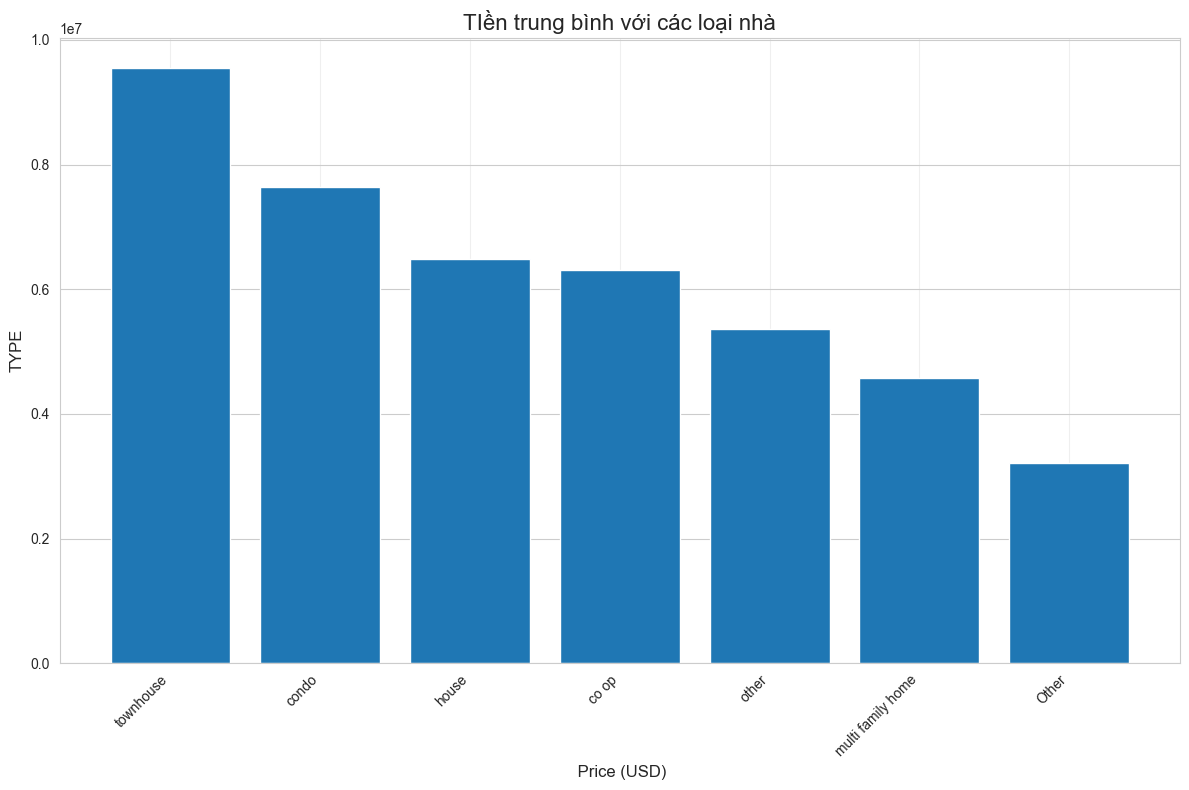

In [64]:
avg_type = df_luxury.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TI·ªÅn trung b√¨nh v·ªõi c√°c lo·∫°i nh√†', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 1. Ph√¢n ph·ªëi gi√° nh√† (PRICE)
- Gi√° nh√† luxury tr·∫£i r·ªông t·ª´ **5M ƒë·∫øn g·∫ßn 200M USD**.  
- Ph√¢n ph·ªëi l·ªách ph·∫£i, nh∆∞ng kh√°c v·ªõi Normal, ph·∫ßn ƒëu√¥i k√©o d√†i t·ªõi h√†ng trƒÉm tri·ªáu USD.  
- Xu·∫•t hi·ªán r√µ r·ªát m·ªôt s·ªë **cƒÉn si√™u sang (super luxury)** tr√™n 50M, k√©o trung b√¨nh gi√° l√™n cao.  

### 2. Ph√¢n ph·ªëi s·ªë ph√≤ng ng·ªß (BEDS)
- Ph·ªï bi·∫øn t·ª´ **3‚Äì6 ph√≤ng ng·ªß**.  
- Xu·∫•t hi·ªán m·ªôt s·ªë cƒÉn bi·ªát th·ª±/townhouse c√≥ **10+ ph√≤ng ng·ªß**, hi·∫øm nh∆∞ng ƒë·∫∑c tr∆∞ng cho ph√¢n kh√∫c n√†y.  

### 3. Ph√¢n ph·ªëi s·ªë ph√≤ng t·∫Øm (BATH)
- ƒêa s·ªë c√≥ **3‚Äì6 ph√≤ng t·∫Øm**, ƒëi k√®m v·ªõi s·ªë ph√≤ng ng·ªß l·ªõn.  
- M·ªôt s·ªë √≠t tr∆∞·ªùng h·ª£p c·ª±c ƒëoan c√≥ tr√™n 10 ph√≤ng t·∫Øm ‚Üí bi·ªát th·ª± ho·∫∑c cƒÉn h·ªô penthouse nhi·ªÅu t·∫ßng.  

### 4. Ph√¢n ph·ªëi di·ªán t√≠ch (PROPERTYSQFT)
- Luxury ch·ªß y·∫øu t·ª´ **3,000 ‚Äì 10,000 sqft**.  
- M·ªôt s·ªë cƒÉn c·ª±c l·ªõn tr√™n **20,000 sqft**, th∆∞·ªùng l√† bi·ªát th·ª± ho·∫∑c penthouse.  

### 5. Ph√¢n ph·ªëi theo m√¥i gi·ªõi (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** d·∫´n ƒë·∫ßu s·ªë l∆∞·ª£ng listing luxury.  
- C√°c m√¥i gi·ªõi chuy√™n ph√¢n kh√∫c cao c·∫•p kh√°c: **Serhant, Sotheby‚Äôs, Brown Harris Stevens**.  
- Th·ªã tr∆∞·ªùng luxury t·∫≠p trung trong tay m·ªôt s·ªë √≠t broker uy t√≠n, mang t√≠nh chuy√™n bi·ªát cao.  

### 6. Ph√¢n ph·ªëi theo lo·∫°i nh√† (PROPERTY_TYPE)
- Luxury t·∫≠p trung nhi·ªÅu nh·∫•t v√†o **condo cao c·∫•p v√† townhouse**.  
- House ƒë∆°n l·∫≠p v√† co-op c√≥ nh∆∞ng √≠t h∆°n.  
- Multi-family home h·∫ßu nh∆∞ kh√¥ng xu·∫•t hi·ªán trong luxury.  

### 7. Ph√¢n ph·ªëi theo khu v·ª±c (BOROUGH)
- **Manhattan √°p ƒë·∫£o g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi**, ch·ªâ m·ªôt ph·∫ßn r·∫•t nh·ªè luxury ·ªü Brooklyn.  
- Kh√¥ng c√≥ luxury ·ªü Queens, Bronx hay Staten Island.  

---

#### üîë Insight ch√≠nh t·ª´ ph√¢n t√≠ch ƒë∆°n bi·∫øn Luxury Segment
1. **Luxury ·ªü NYC g·∫ßn nh∆∞ ƒë·ªìng nghƒ©a v·ªõi Manhattan**, n∆°i t·∫≠p trung to√†n b·ªô ngu·ªìn cung cao c·∫•p.  
2. Gi√° dao ƒë·ªông r·ªông, t·ª´ **5M ‚Äì 200M USD**, v·ªõi m·ªôt s·ªë si√™u ph·∫©m k√©o ph√¢n ph·ªëi l√™n c·ª±c ƒëoan.  
3. ƒê·∫∑c ƒëi·ªÉm cƒÉn h·ªô luxury: **di·ªán t√≠ch l·ªõn (3,000‚Äì10,000 sqft), nhi·ªÅu ph√≤ng (3‚Äì6 ph√≤ng ng·ªß, 3‚Äì6 ph√≤ng t·∫Øm)**.  
4. Th·ªã tr∆∞·ªùng ƒë∆∞·ª£c chi ph·ªëi b·ªüi **m·ªôt nh√≥m broker cao c·∫•p**, n·ªïi b·∫≠t l√† Compass, Douglas Elliman, Corcoran, Serhant v√† Sotheby‚Äôs.  
5. **Condo & townhouse** l√† h√¨nh th·ª©c ch√≠nh c·ªßa luxury, ph·∫£n √°nh ƒë·∫∑c th√π ƒë√¥ th·ªã Manhattan.  

‚û°Ô∏è Luxury segment t·∫°i NYC c√≥ t√≠nh t·∫≠p trung c·ª±c cao v·ªÅ c·∫£ **ƒë·ªãa l√Ω (Manhattan)** l·∫´n **broker**. ƒê√¢y l√† th·ªã tr∆∞·ªùng kh√°c bi·ªát ho√†n to√†n so v·ªõi Normal segment, ph·ª•c v·ª• nh√≥m kh√°ch h√†ng si√™u gi√†u.


In [65]:
import plotly.express as px

fig = px.scatter_mapbox(df_luxury, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1400820636.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

